In [114]:
%matplotlib inline
import math
import re
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re

from collections import defaultdict
from scipy.stats import pearsonr
import pandas as pd
from IPython.display import display

# Load calc agg features

In [115]:
from pathlib import Path
# Set up file paths
notebook_dir = Path.cwd().resolve()
data_save_path = (notebook_dir / '..' /  'Data').resolve()

print(f"Data path: {data_save_path}")

Data path: Y:\Studium\3. Sem UniPI\Data Analytics 4 digital Health\data_analytics_4_health_unipi\Data


In [116]:
DATA_DIR = (notebook_dir / '..' /  '..' /  'Data').resolve()
print(DATA_DIR)

DATASETS = {
    "heart_diagnoses_1": "heart_diagnoses_1.csv",
    "laboratory_events_codes_2": "laboratory_events_codes_2.csv",
    "microbiology_events_codes_3": "microbiology_events_codes_3.csv",
    "procedure_code_4": "procedure_code_4.csv",
}

Y:\Studium\3. Sem UniPI\Data Analytics 4 digital Health\Data


In [117]:
paths = [f"{DATA_DIR}/{DATASETS[dataset].replace('.csv', '_agg_features.csv')}" for dataset in DATASETS.keys()]
dfs = [pd.read_csv(Path(path)) for path in paths]
len(dfs), 

(4,)

In [118]:
for df, name in zip(dfs, DATASETS.keys()):
    print(f"\nDataset: {name}")
    print("="*80)
    print(f"Shape: {df.shape}")
    print("Columns:")
    print(df.columns)
    display(df.head(2))
    display(df.describe())


Dataset: heart_diagnoses_1
Shape: (4864, 18)
Columns:
Index(['subject_id', 'hadm_id', 'gender', 'age', 'is_dead', 'charttime',
       'icd_code', 'icd_cat', 'imaging_variety', 'doc_complexity_index',
       'cardiac_comorbidity_score', 'has_heart', 'has_hf', 'has_arr',
       'has_ami', 'has_arrest', 'has_valvular', 'has_inflammatory'],
      dtype='object')


,subject_id,hadm_id,gender,age,is_dead,charttime,icd_code,icd_cat,imaging_variety,doc_complexity_index,cardiac_comorbidity_score,has_heart,has_hf,has_arr,has_ami,has_arrest,has_valvular,has_inflammatory
0,10000980,29654838,F,75.0,1,2188-01-06 03:00:00,I50,heart_failure,3,23.273517,1,1,1,0,0,0,0,0
1,10000980,26913865,F,75.0,1,2189-07-04 03:00:00,I21,acute_mi,4,21.972737,1,1,0,0,1,0,0,0


,subject_id,hadm_id,age,is_dead,imaging_variety,doc_complexity_index,cardiac_comorbidity_score,has_heart,has_hf,has_arr,has_ami,has_arrest,has_valvular,has_inflammatory
count,4.864000e+03,4.864000e+03,1363.000000,4864.000000,4864.000000,4864.000000,4864.000000,4864.0,4864.000000,4864.000000,4864.000000,4864.000000,4864.000000,4864.000000
mean,1.510717e+07,2.501745e+07,68.978723,0.081826,3.297081,22.306007,0.802220,1.0,0.297492,0.139391,0.295847,0.000411,0.057977,0.011102
std,2.938761e+06,2.873736e+06,14.973358,0.274127,0.529166,1.271144,0.398366,0.0,0.457202,0.346390,0.456470,0.020276,0.233724,0.104790
min,1.000098e+07,2.000446e+07,18.000000,0.000000,2.000000,17.229959,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.252385e+07,2.260252e+07,60.000000,0.000000,3.000000,21.481264,1.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.507553e+07,2.503238e+07,70.000000,0.000000,3.000000,22.309730,1.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.764939e+07,2.746833e+07,81.000000,0.000000,4.000000,23.174916,1.000000,1.0,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,1.999860e+07,2.999967e+07,95.000000,1.000000,6.000000,27.656885,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000



Dataset: laboratory_events_codes_2
Shape: (4855, 34)
Columns:
Index(['subject_id', 'hadm_id', 'num_labs', 'abnormal_ratio', 'qc_fail_ratio',
       'lab_time_span_hours', 'unique_lab_tests', 'unique_examination_groups',
       'fluid_diversity', 'unique_analysis_batches', 'has_labs',
       'max_blood_glucose', 'max_blood_lactate', 'max_blood_anion gap',
       'max_blood_creatinine', 'max_blood_urea nitrogen',
       'max_blood_potassium', 'max_blood_sodium', 'min_blood_hemoglobin',
       'min_blood_hematocrit', 'max_blood_c-reactive protein',
       'max_urine_glucose', 'max_urine_creatinine', 'max_urine_urea nitrogen',
       'max_urine_sodium', 'max_urine_protein', 'max_gas_pO2', 'max_gas_pCO2',
       'max_gas_pH', 'max_gas_base excess', 'count_cbc', 'count_blood_gas',
       'count_liver', 'count_cardiac'],
      dtype='object')


,subject_id,hadm_id,num_labs,abnormal_ratio,qc_fail_ratio,lab_time_span_hours,unique_lab_tests,unique_examination_groups,fluid_diversity,unique_analysis_batches,...,max_urine_sodium,max_urine_protein,max_gas_pO2,max_gas_pCO2,max_gas_pH,max_gas_base excess,count_cbc,count_blood_gas,count_liver,count_cardiac
0,10000980,26913865.0,166,0.0,0.024096,140.466667,45,12,1,136,...,NaN,NaN,NaN,NaN,73.2000,NaN,59.0,0.0,7.0,10.0
1,10000980,29654838.0,59,0.0,0.000000,33.433333,35,8,1,53,...,NaN,NaN,NaN,NaN,1.7119,NaN,18.0,0.0,2.0,7.0


,subject_id,hadm_id,num_labs,abnormal_ratio,qc_fail_ratio,lab_time_span_hours,unique_lab_tests,unique_examination_groups,fluid_diversity,unique_analysis_batches,...,max_urine_sodium,max_urine_protein,max_gas_pO2,max_gas_pCO2,max_gas_pH,max_gas_base excess,count_cbc,count_blood_gas,count_liver,count_cardiac
count,4.855000e+03,4.855000e+03,4855.000000,4855.000000,4855.000000,4855.000000,4855.000000,4855.000000,4855.000000,4855.000000,...,676.000000,903.000000,1202.000000,1197.000000,4713.000000,1203.000000,4855.000000,4855.000000,4855.000000,4855.000000
mean,1.510805e+07,2.501709e+07,240.493306,0.000086,0.020154,115.134343,47.647168,9.218332,1.552626,119.398764,...,57.590237,85.225692,26.367305,6.441000,59.284682,2.929343,69.267971,23.490834,5.736972,7.646344
std,2.939544e+06,2.874953e+06,513.277369,0.000800,0.014587,111.872999,21.559055,5.192832,0.645785,72.279992,...,33.727525,113.275414,18.725899,1.798151,105.428314,5.146037,121.124737,164.087887,20.387880,9.589104
min,1.000098e+07,2.000446e+07,3.000000,0.000000,0.000000,0.000000,3.000000,1.000000,1.000000,3.000000,...,10.000000,0.100000,2.261000,3.059000,0.516800,-15.000000,0.000000,0.000000,0.000000,0.000000
25%,1.251722e+07,2.260072e+07,79.000000,0.000000,0.011236,44.233333,31.000000,6.000000,1.000000,67.000000,...,29.000000,30.000000,10.640000,5.320000,1.356600,0.000000,27.000000,0.000000,0.000000,3.000000
50%,1.507734e+07,2.503202e+07,136.000000,0.000000,0.019002,81.100000,43.000000,8.000000,1.000000,103.000000,...,54.000000,30.000000,19.152000,6.118000,60.200000,2.000000,42.000000,0.000000,0.000000,6.000000
75%,1.765293e+07,2.746949e+07,259.000000,0.000000,0.027141,149.150000,60.000000,11.000000,2.000000,158.000000,...,81.000000,100.000000,43.191750,7.182000,85.000000,5.000000,80.000000,6.000000,5.000000,10.000000
max,1.999860e+07,2.999967e+07,22580.000000,0.019802,0.285714,1257.800000,175.000000,54.000000,5.000000,543.000000,...,212.000000,660.000000,73.017000,19.152000,3825.000000,33.000000,4840.000000,8875.000000,910.000000,240.000000



Dataset: microbiology_events_codes_3
Shape: (2756, 8)
Columns:
Index(['subject_id', 'hadm_id', 'has_micro', 'total_microbio_events',
       'unique_specimen_types', 'unique_organisms', 'resistant_ratio',
       'unique_antibiotics'],
      dtype='object')


,subject_id,hadm_id,has_micro,total_microbio_events,unique_specimen_types,unique_organisms,resistant_ratio,unique_antibiotics
0,10000980,26913865,1,1,1,0,0.0,0
1,10002155,23822395,1,12,4,0,0.0,0


,subject_id,hadm_id,has_micro,total_microbio_events,unique_specimen_types,unique_organisms,resistant_ratio,unique_antibiotics
count,2.756000e+03,2.756000e+03,2756.0,2756.000000,2756.000000,2756.000000,2756.000000,2756.000000
mean,1.561649e+07,2.503819e+07,1.0,5.655298,2.033745,0.356313,0.022155,1.425617
std,3.105062e+06,2.879683e+06,0.0,8.387583,1.431543,0.715932,0.097512,3.740287
min,1.000098e+07,2.000790e+07,1.0,1.000000,1.000000,0.000000,0.000000,0.000000
25%,1.294230e+07,2.262280e+07,1.0,1.000000,1.000000,0.000000,0.000000,0.000000
50%,1.569462e+07,2.506436e+07,1.0,2.500000,2.000000,0.000000,0.000000,0.000000
75%,1.847125e+07,2.752187e+07,1.0,7.000000,3.000000,1.000000,0.000000,0.000000
max,1.999767e+07,2.999967e+07,1.0,122.000000,15.000000,9.000000,1.000000,23.000000



Dataset: procedure_code_4
Shape: (3459, 6)
Columns:
Index(['subject_id', 'hadm_id', 'has_procedure', 'total_procedures',
       'unique_icd_codes', 'procedure_span_days'],
      dtype='object')


,subject_id,hadm_id,has_procedure,total_procedures,unique_icd_codes,procedure_span_days
0,10000980,26913865,1,7,7,0.0
1,10002013,24760295,1,2,2,0.0


,subject_id,hadm_id,has_procedure,total_procedures,unique_icd_codes,procedure_span_days
count,3.459000e+03,3.459000e+03,3459.0,3459.000000,3459.000000,3459.000000
mean,1.499381e+07,2.502943e+07,1.0,4.191096,4.058398,1.442324
std,2.868527e+06,2.853466e+06,0.0,2.989024,2.717689,3.541510
min,1.000098e+07,2.000790e+07,1.0,1.000000,1.000000,0.000000
25%,1.249509e+07,2.264270e+07,1.0,2.000000,2.000000,0.000000
50%,1.495295e+07,2.506423e+07,1.0,3.000000,3.000000,0.000000
75%,1.747168e+07,2.747180e+07,1.0,6.000000,6.000000,1.000000
max,1.999850e+07,2.999967e+07,1.0,28.000000,21.000000,43.000000


# Merge

In [119]:
from functools import reduce

# Merge all on ['subject_id', 'hadm_id']
patient_profile = reduce(
    lambda left, right: pd.merge(left, right, on=['subject_id', 'hadm_id'], how='outer'),
    dfs
)

In [120]:
len(patient_profile.columns), patient_profile.columns

(60,
 Index(['subject_id', 'hadm_id', 'gender', 'age', 'is_dead', 'charttime',
        'icd_code', 'icd_cat', 'imaging_variety', 'doc_complexity_index',
        'cardiac_comorbidity_score', 'has_heart', 'has_hf', 'has_arr',
        'has_ami', 'has_arrest', 'has_valvular', 'has_inflammatory', 'num_labs',
        'abnormal_ratio', 'qc_fail_ratio', 'lab_time_span_hours',
        'unique_lab_tests', 'unique_examination_groups', 'fluid_diversity',
        'unique_analysis_batches', 'has_labs', 'max_blood_glucose',
        'max_blood_lactate', 'max_blood_anion gap', 'max_blood_creatinine',
        'max_blood_urea nitrogen', 'max_blood_potassium', 'max_blood_sodium',
        'min_blood_hemoglobin', 'min_blood_hematocrit',
        'max_blood_c-reactive protein', 'max_urine_glucose',
        'max_urine_creatinine', 'max_urine_urea nitrogen', 'max_urine_sodium',
        'max_urine_protein', 'max_gas_pO2', 'max_gas_pCO2', 'max_gas_pH',
        'max_gas_base excess', 'count_cbc', 'count_blood_gas'

In [121]:
# Targeted NA handling
has_columns = [col for col in patient_profile.columns if col.startswith('has_')]

print(has_columns)
# Fill indicators with 0 (absent)
patient_profile[has_columns] = patient_profile[has_columns].fillna(0).astype(int)

['has_heart', 'has_hf', 'has_arr', 'has_ami', 'has_arrest', 'has_valvular', 'has_inflammatory', 'has_labs', 'has_micro', 'has_procedure']


In [122]:
# Identify numeric columns (exclude ids/flags)
numeric_cols = [c for c in patient_profile.select_dtypes(include='number').columns
                if c not in ('subject_id', 'hadm_id')]

# Identify the 'has_' indicator columns
has_columns = [ 'has_heart', 'has_labs', 'has_micro', 'has_procedure']
print(f"Data source indicators: {has_columns}")

# Heuristic: detect count-like columns and fill zeros when corresponding has_* indicates absence
count_like_keywords = ('num_', 'total_', 'unique_', 'count', '_count')
count_cols = [c for c in numeric_cols if any(k in c for k in count_like_keywords)]
count_cols

Data source indicators: ['has_heart', 'has_labs', 'has_micro', 'has_procedure']


['num_labs',
 'unique_lab_tests',
 'unique_examination_groups',
 'unique_analysis_batches',
 'count_cbc',
 'count_blood_gas',
 'count_liver',
 'count_cardiac',
 'total_microbio_events',
 'unique_specimen_types',
 'unique_organisms',
 'unique_antibiotics',
 'total_procedures',
 'unique_icd_codes']

In [123]:
# mapping heuristics from feature name -> has_ flag (extend if needed)
map_keywords = {
    'lab': 'has_labs',
    'micro': 'has_micro',
    'procedure': 'has_procedure',
    'proc': 'has_procedure',
    'note': 'has_heart',
}

for col in count_cols:
    filled = False
    lname = col.lower()
    for key, has_flag in map_keywords.items():
        if key in lname and has_flag in patient_profile.columns:
            patient_profile.loc[patient_profile[has_flag] == 0, col] = 0
            filled = True
            break
    if not filled:
        # safe fallback: fill remaining NaNs with 0 (counts mean absence)
        patient_profile[col] = patient_profile[col].fillna(0)

# Measurements / statistics: keep NaN but create missing indicators
exclude_from_measure = set(count_cols) | set(has_columns) | {'subject_id', 'hadm_id'}
measurement_cols = [c for c in numeric_cols if c not in exclude_from_measure and c != 'is_dead']

for c in measurement_cols:
    patient_profile[c + '_missing'] = patient_profile[c].isna().astype(int)

In [124]:
patient_profile.describe()

,subject_id,hadm_id,age,is_dead,imaging_variety,doc_complexity_index,cardiac_comorbidity_score,has_heart,has_hf,has_arr,...,max_urine_creatinine_missing,max_urine_urea nitrogen_missing,max_urine_sodium_missing,max_urine_protein_missing,max_gas_pO2_missing,max_gas_pCO2_missing,max_gas_pH_missing,max_gas_base excess_missing,resistant_ratio_missing,procedure_span_days_missing
count,5.166000e+03,5.166000e+03,1363.000000,4864.000000,4864.000000,4864.000000,4864.000000,5166.000000,5166.000000,5166.000000,...,5166.000000,5166.000000,5166.000000,5166.000000,5166.000000,5166.000000,5166.000000,5166.000000,5166.000000,5166.000000
mean,1.539306e+07,2.501832e+07,68.978723,0.081826,3.297081,22.306007,0.802220,0.941541,0.280101,0.131243,...,0.844173,0.878242,0.869144,0.825203,0.767325,0.768293,0.087689,0.767131,0.466512,0.330430
std,3.073751e+06,2.871364e+06,14.973358,0.274127,0.529166,1.271144,0.398366,0.234632,0.449092,0.337698,...,0.362726,0.327037,0.337275,0.379830,0.422578,0.421964,0.282869,0.422700,0.498926,0.470413
min,1.000098e+07,2.000446e+07,18.000000,0.000000,2.000000,17.229959,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.267767e+07,2.261127e+07,60.000000,0.000000,3.000000,21.481264,1.000000,1.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000
50%,1.539807e+07,2.502269e+07,70.000000,0.000000,3.000000,22.309730,1.000000,1.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000
75%,1.812905e+07,2.746995e+07,81.000000,0.000000,4.000000,23.174916,1.000000,1.000000,1.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000
max,1.999860e+07,2.999967e+07,95.000000,1.000000,6.000000,27.656885,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [125]:
patient_profile.head()

,subject_id,hadm_id,gender,age,is_dead,charttime,icd_code,icd_cat,imaging_variety,doc_complexity_index,...,max_urine_creatinine_missing,max_urine_urea nitrogen_missing,max_urine_sodium_missing,max_urine_protein_missing,max_gas_pO2_missing,max_gas_pCO2_missing,max_gas_pH_missing,max_gas_base excess_missing,resistant_ratio_missing,procedure_span_days_missing
0,10000980,26913865,F,75.0,1.0,2189-07-04 03:00:00,I21,acute_mi,4.0,21.972737,...,1,1,1,1,1,1,0,1,0,0
1,10000980,29654838,F,75.0,1.0,2188-01-06 03:00:00,I50,heart_failure,3.0,23.273517,...,1,1,1,1,1,1,0,1,1,1
2,10002013,24760295,F,NaN,0.0,2160-07-13 03:00:00,I21,acute_mi,4.0,20.214975,...,1,1,1,1,1,1,0,1,1,0
3,10002155,23822395,F,NaN,0.0,2129-08-19 03:00:00,I21,acute_mi,3.0,22.286569,...,0,0,0,1,0,0,0,0,0,0
4,10004457,28723315,M,66.0,0.0,2141-08-14 03:00:00,I35,valvular,3.0,21.351221,...,1,1,1,1,1,1,0,1,1,1


# Completeness Analysis

In [126]:
# Identify the 'has_' indicator columns
has_columns = [ 'has_heart', 'has_labs', 'has_micro', 'has_procedure']
print(f"Data source indicators: {has_columns}")

Data source indicators: ['has_heart', 'has_labs', 'has_micro', 'has_procedure']



COMPLETENESS SUMMARY

Per-Source Availability:
  has_heart: 4,864 patients (94.2%)
  has_labs: 4,855 patients (94.0%)
  has_micro: 2,756 patients (53.3%)
  has_procedure: 3,459 patients (67.0%)

--------------------------------------------------------------------------------
DATA SOURCE COMBINATIONS:
--------------------------------------------------------------------------------
  [1-1-1-1] heart, labs, micro, procedure: 1,932 (37.4%)
  [1-1-0-1] heart, labs, procedure: 1,525 (29.5%)
  [1-1-0-0] heart, labs: 876 (17.0%)
  [1-1-1-0] heart, labs, micro: 522 (10.1%)
  [0-0-1-0] micro: 302 (5.8%)
  [1-0-0-0] heart: 7 (0.1%)
  [1-0-0-1] heart, procedure: 2 (0.0%)


C:\Users\dgars\AppData\Local\Temp\ipykernel_3208\1571333312.py:42: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(sources, rotation=45, ha='right')


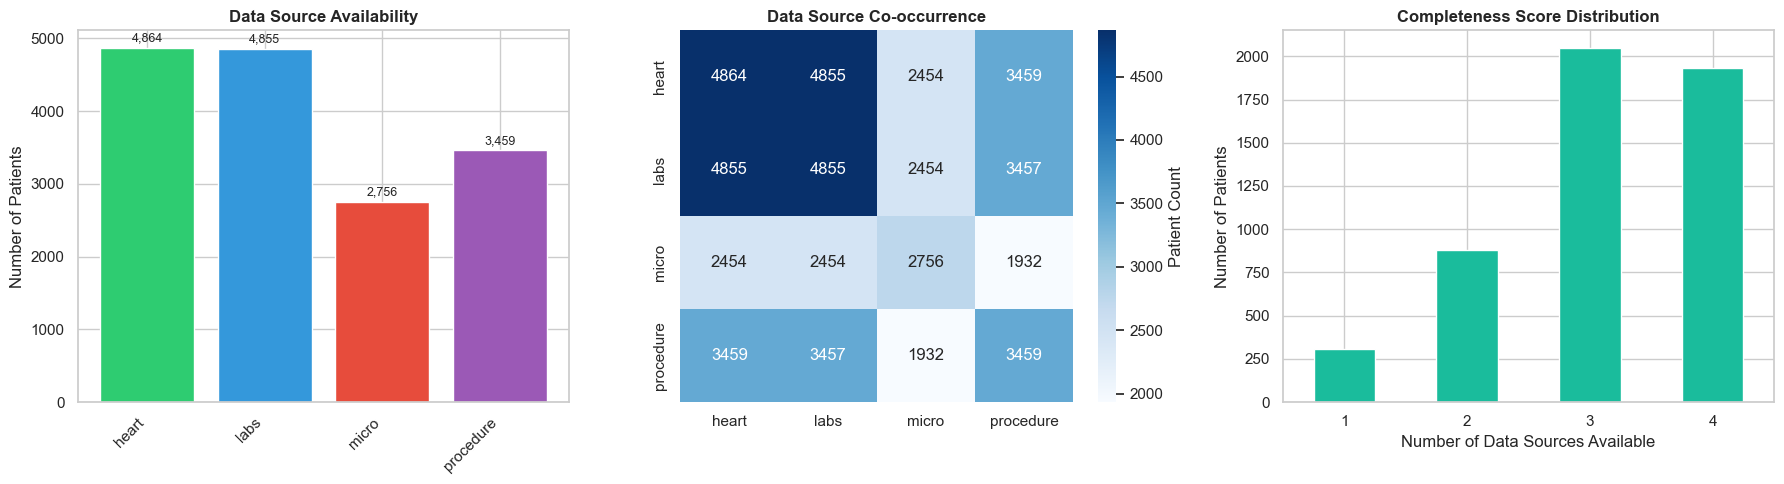


COMPLETENESS SCORE SUMMARY

Total patients: 5,166
Patients with ALL sources: 1,932
Patients with NO sources: 0
Average sources per patient: 3.08


In [127]:
# Completeness Matrix - Check which data sources are available for each patient
completeness = patient_profile[has_columns].copy()

# Summary statistics
print("\n" + "="*80)
print("COMPLETENESS SUMMARY")
print("="*80)

# Per-source completeness
print("\nPer-Source Availability:")
for col in has_columns:
    count = (patient_profile[col] == 1).sum()
    pct = count / len(patient_profile) * 100
    print(f"  {col}: {count:,} patients ({pct:.1f}%)")

# Combination completeness
print("\n" + "-"*80)
print("DATA SOURCE COMBINATIONS:")
print("-"*80)

# Create a combined key for each row
completeness['combination'] = completeness[has_columns].astype(int).astype(str).agg('-'.join, axis=1)
combo_counts = completeness['combination'].value_counts()

# Create readable labels
for combo, count in combo_counts.items():
    sources = [has_columns[i].replace('has_', '') for i, val in enumerate(combo.split('-')) if val == '1']
    sources_str = ', '.join(sources) if sources else 'None'
    pct = count / len(patient_profile) * 100
    print(f"  [{combo}] {sources_str}: {count:,} ({pct:.1f}%)")

# Visualization
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot 1: Bar chart of individual source availability
ax1 = axes[0]
source_counts = [(col.replace('has_', ''), (patient_profile[col] == 1).sum()) for col in has_columns]
sources, counts = zip(*source_counts)
bars = ax1.bar(sources, counts, color=['#2ecc71', '#3498db', '#e74c3c', '#9b59b6'][:len(has_columns)])
ax1.set_ylabel('Number of Patients')
ax1.set_title('Data Source Availability', fontweight='bold')
ax1.set_xticklabels(sources, rotation=45, ha='right')
for bar, count in zip(bars, counts):
    ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 50, 
             f'{count:,}', ha='center', va='bottom', fontsize=9)

# Plot 2: Heatmap of co-occurrence
ax2 = axes[1]
cooccurrence = pd.DataFrame(index=has_columns, columns=has_columns, dtype=float)
for col1 in has_columns:
    for col2 in has_columns:
        both = ((patient_profile[col1] == 1) & (patient_profile[col2] == 1)).sum()
        cooccurrence.loc[col1, col2] = both

# Rename for display
cooccurrence.index = [c.replace('has_', '') for c in cooccurrence.index]
cooccurrence.columns = [c.replace('has_', '') for c in cooccurrence.columns]

sns.heatmap(cooccurrence.astype(float), annot=True, fmt='.0f', cmap='Blues', 
            ax=ax2, cbar_kws={'label': 'Patient Count'})
ax2.set_title('Data Source Co-occurrence', fontweight='bold')

# Plot 3: Completeness score distribution
ax3 = axes[2]
patient_profile['completeness_score'] = patient_profile[has_columns].sum(axis=1)
patient_profile['completeness_score'].value_counts().sort_index().plot(kind='bar', ax=ax3, color='#1abc9c')
ax3.set_xlabel('Number of Data Sources Available')
ax3.set_ylabel('Number of Patients')
ax3.set_title('Completeness Score Distribution', fontweight='bold')
ax3.set_xticklabels(ax3.get_xticklabels(), rotation=0)

plt.tight_layout()
plt.savefig(r'../plots/1.2_completeness_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

# Final summary
print("\n" + "="*80)
print("COMPLETENESS SCORE SUMMARY")
print("="*80)
print(f"\nTotal patients: {len(patient_profile):,}")
print(f"Patients with ALL sources: {(patient_profile['completeness_score'] == len(has_columns)).sum():,}")
print(f"Patients with NO sources: {(patient_profile['completeness_score'] == 0).sum():,}")
print(f"Average sources per patient: {patient_profile['completeness_score'].mean():.2f}")

## Encode gender

In [128]:
patient_profile["gender"].value_counts(dropna=False)

gender
M      2841
F      2017
NaN     308
Name: count, dtype: int64

In [129]:
if 'patient_profile' in globals() and 'gender' in patient_profile.columns:
    g2 = patient_profile['gender'].astype(str).str.strip().str.upper()
    patient_profile['gender_F'] = (g2 == 'F').astype(int)
    patient_profile['gender_M'] = (g2 == 'M').astype(int)
    patient_profile['gender_missing'] = (~g2.isin(['F', 'M'])).astype(int)
    # drop any legacy encoding to avoid reuse
    patient_profile = patient_profile.drop(columns=['gender_enc'], errors='ignore')
    patient_profile = patient_profile.drop(columns=['gender'], errors='ignore')

In [130]:
for col in ['gender_F', 'gender_M', 'gender_missing']:
    if col in patient_profile.columns:
        print(f"{col} counts:")
        display(patient_profile[col].value_counts(dropna=False))

gender_F counts:


gender_F
0    3149
1    2017
Name: count, dtype: int64

gender_M counts:


gender_M
1    2841
0    2325
Name: count, dtype: int64

gender_missing counts:


gender_missing
0    4858
1     308
Name: count, dtype: int64

### boxplots

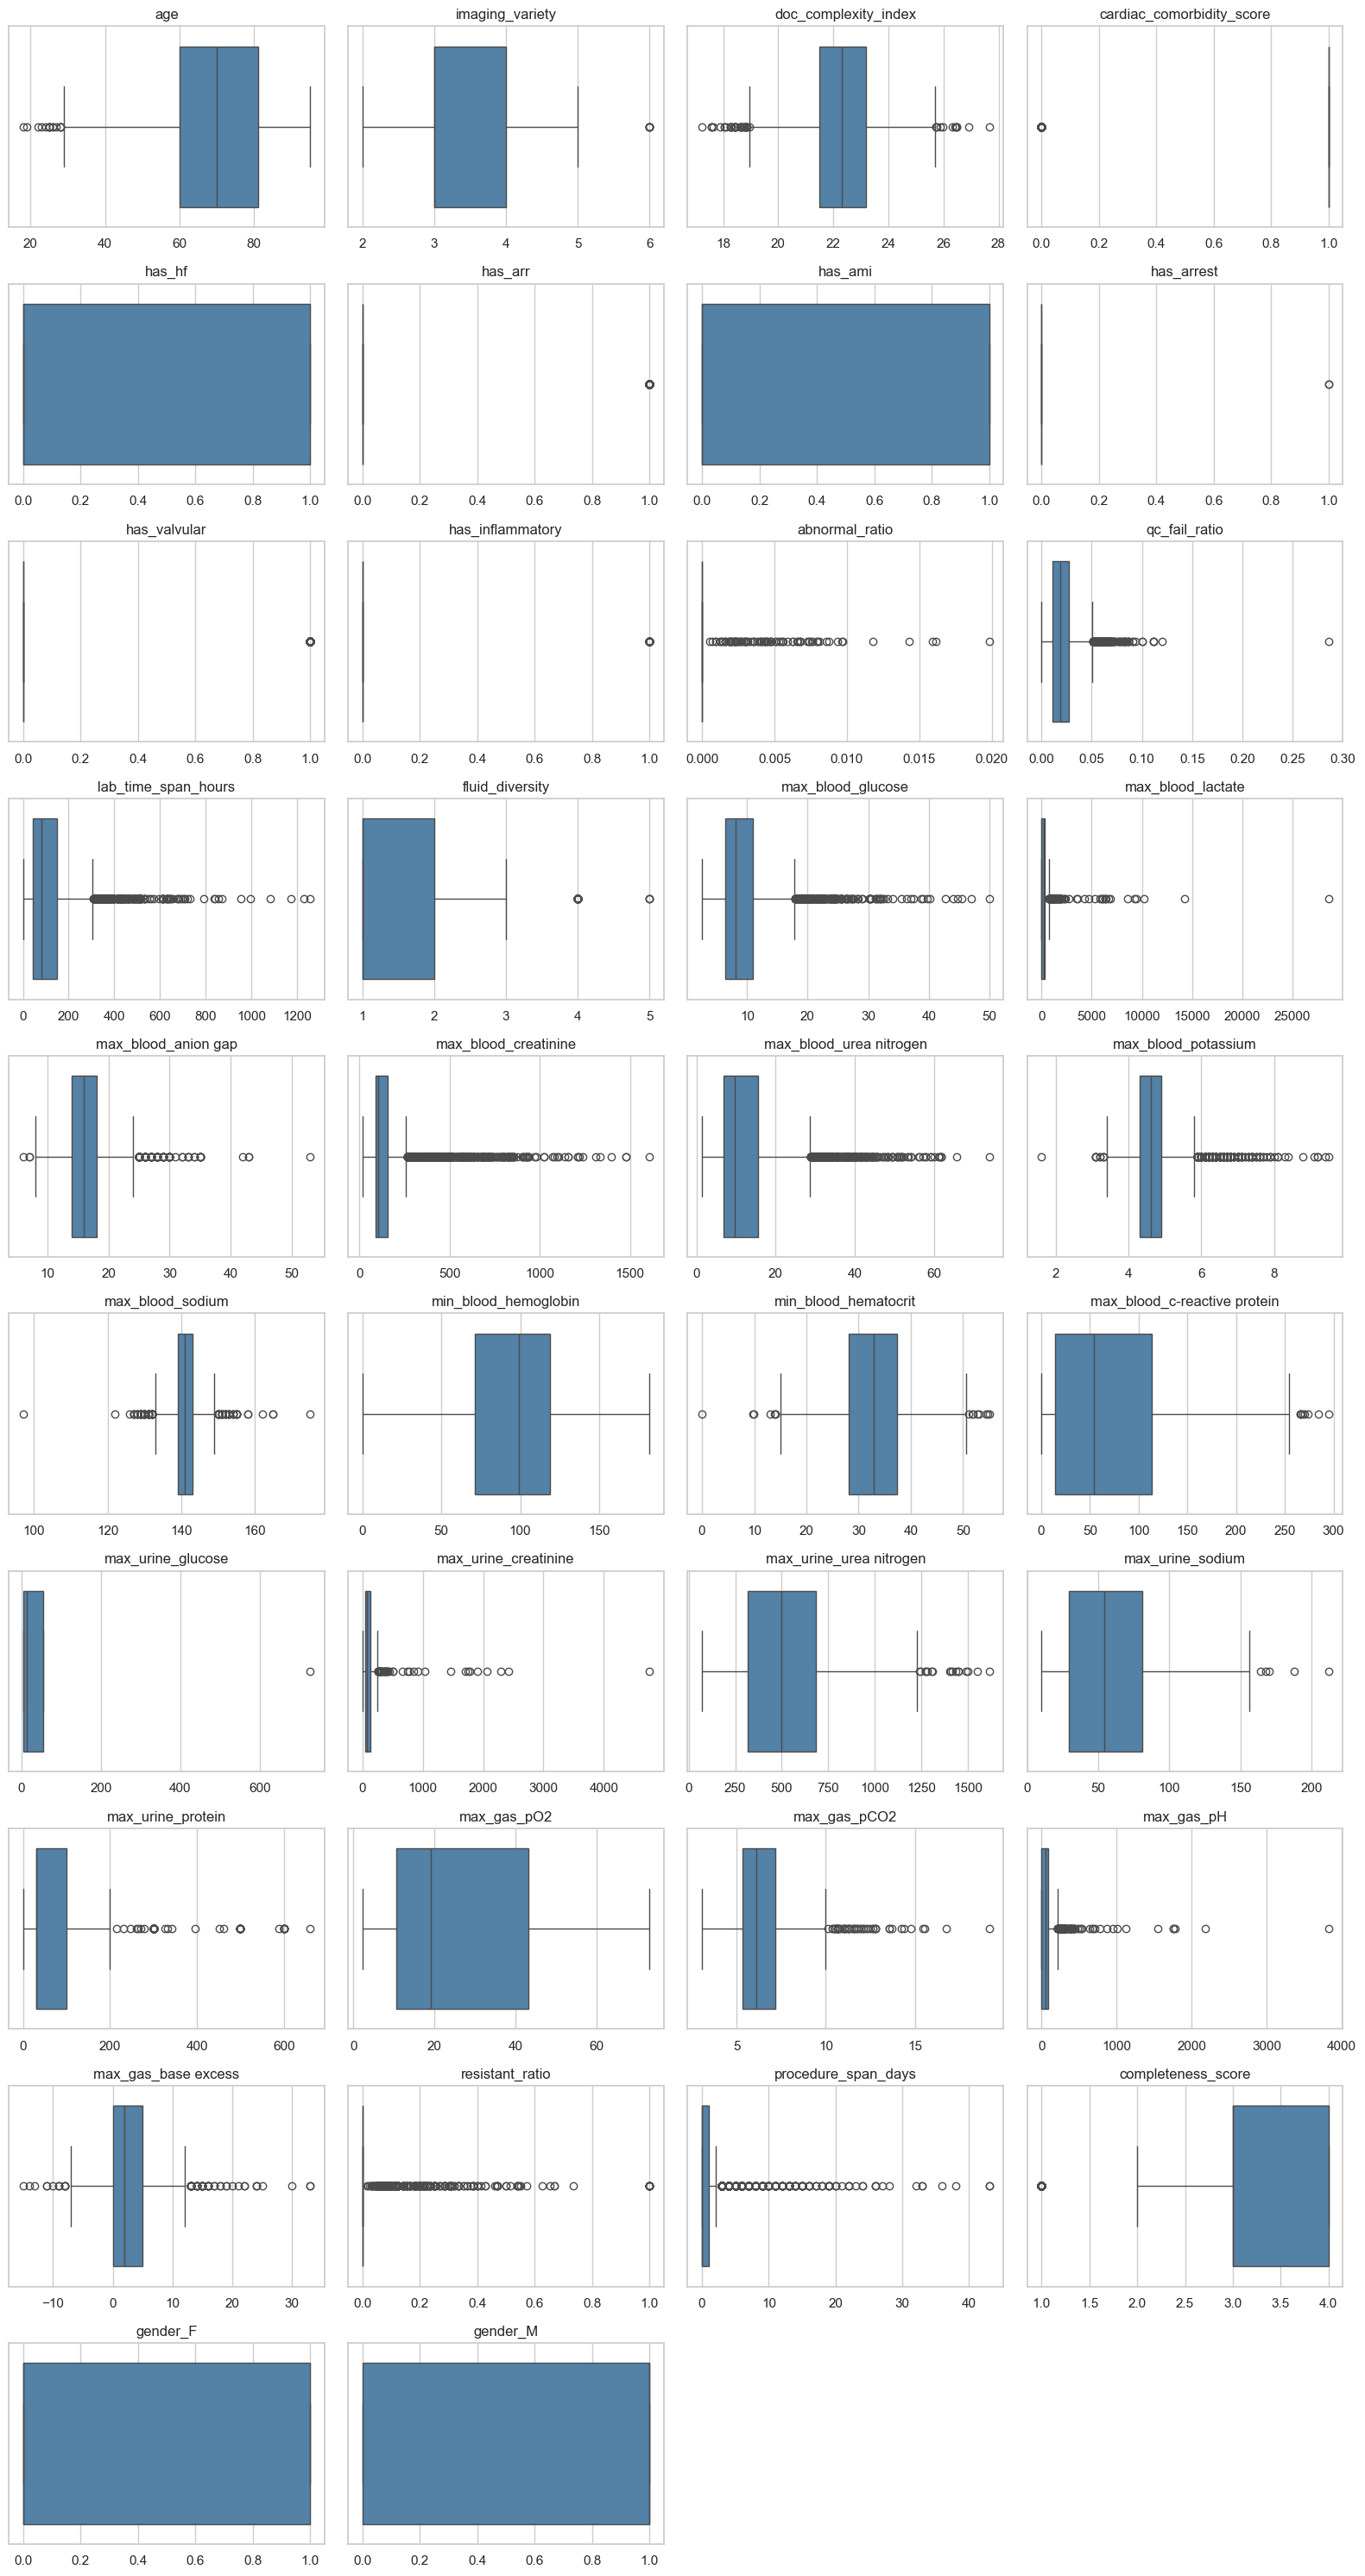

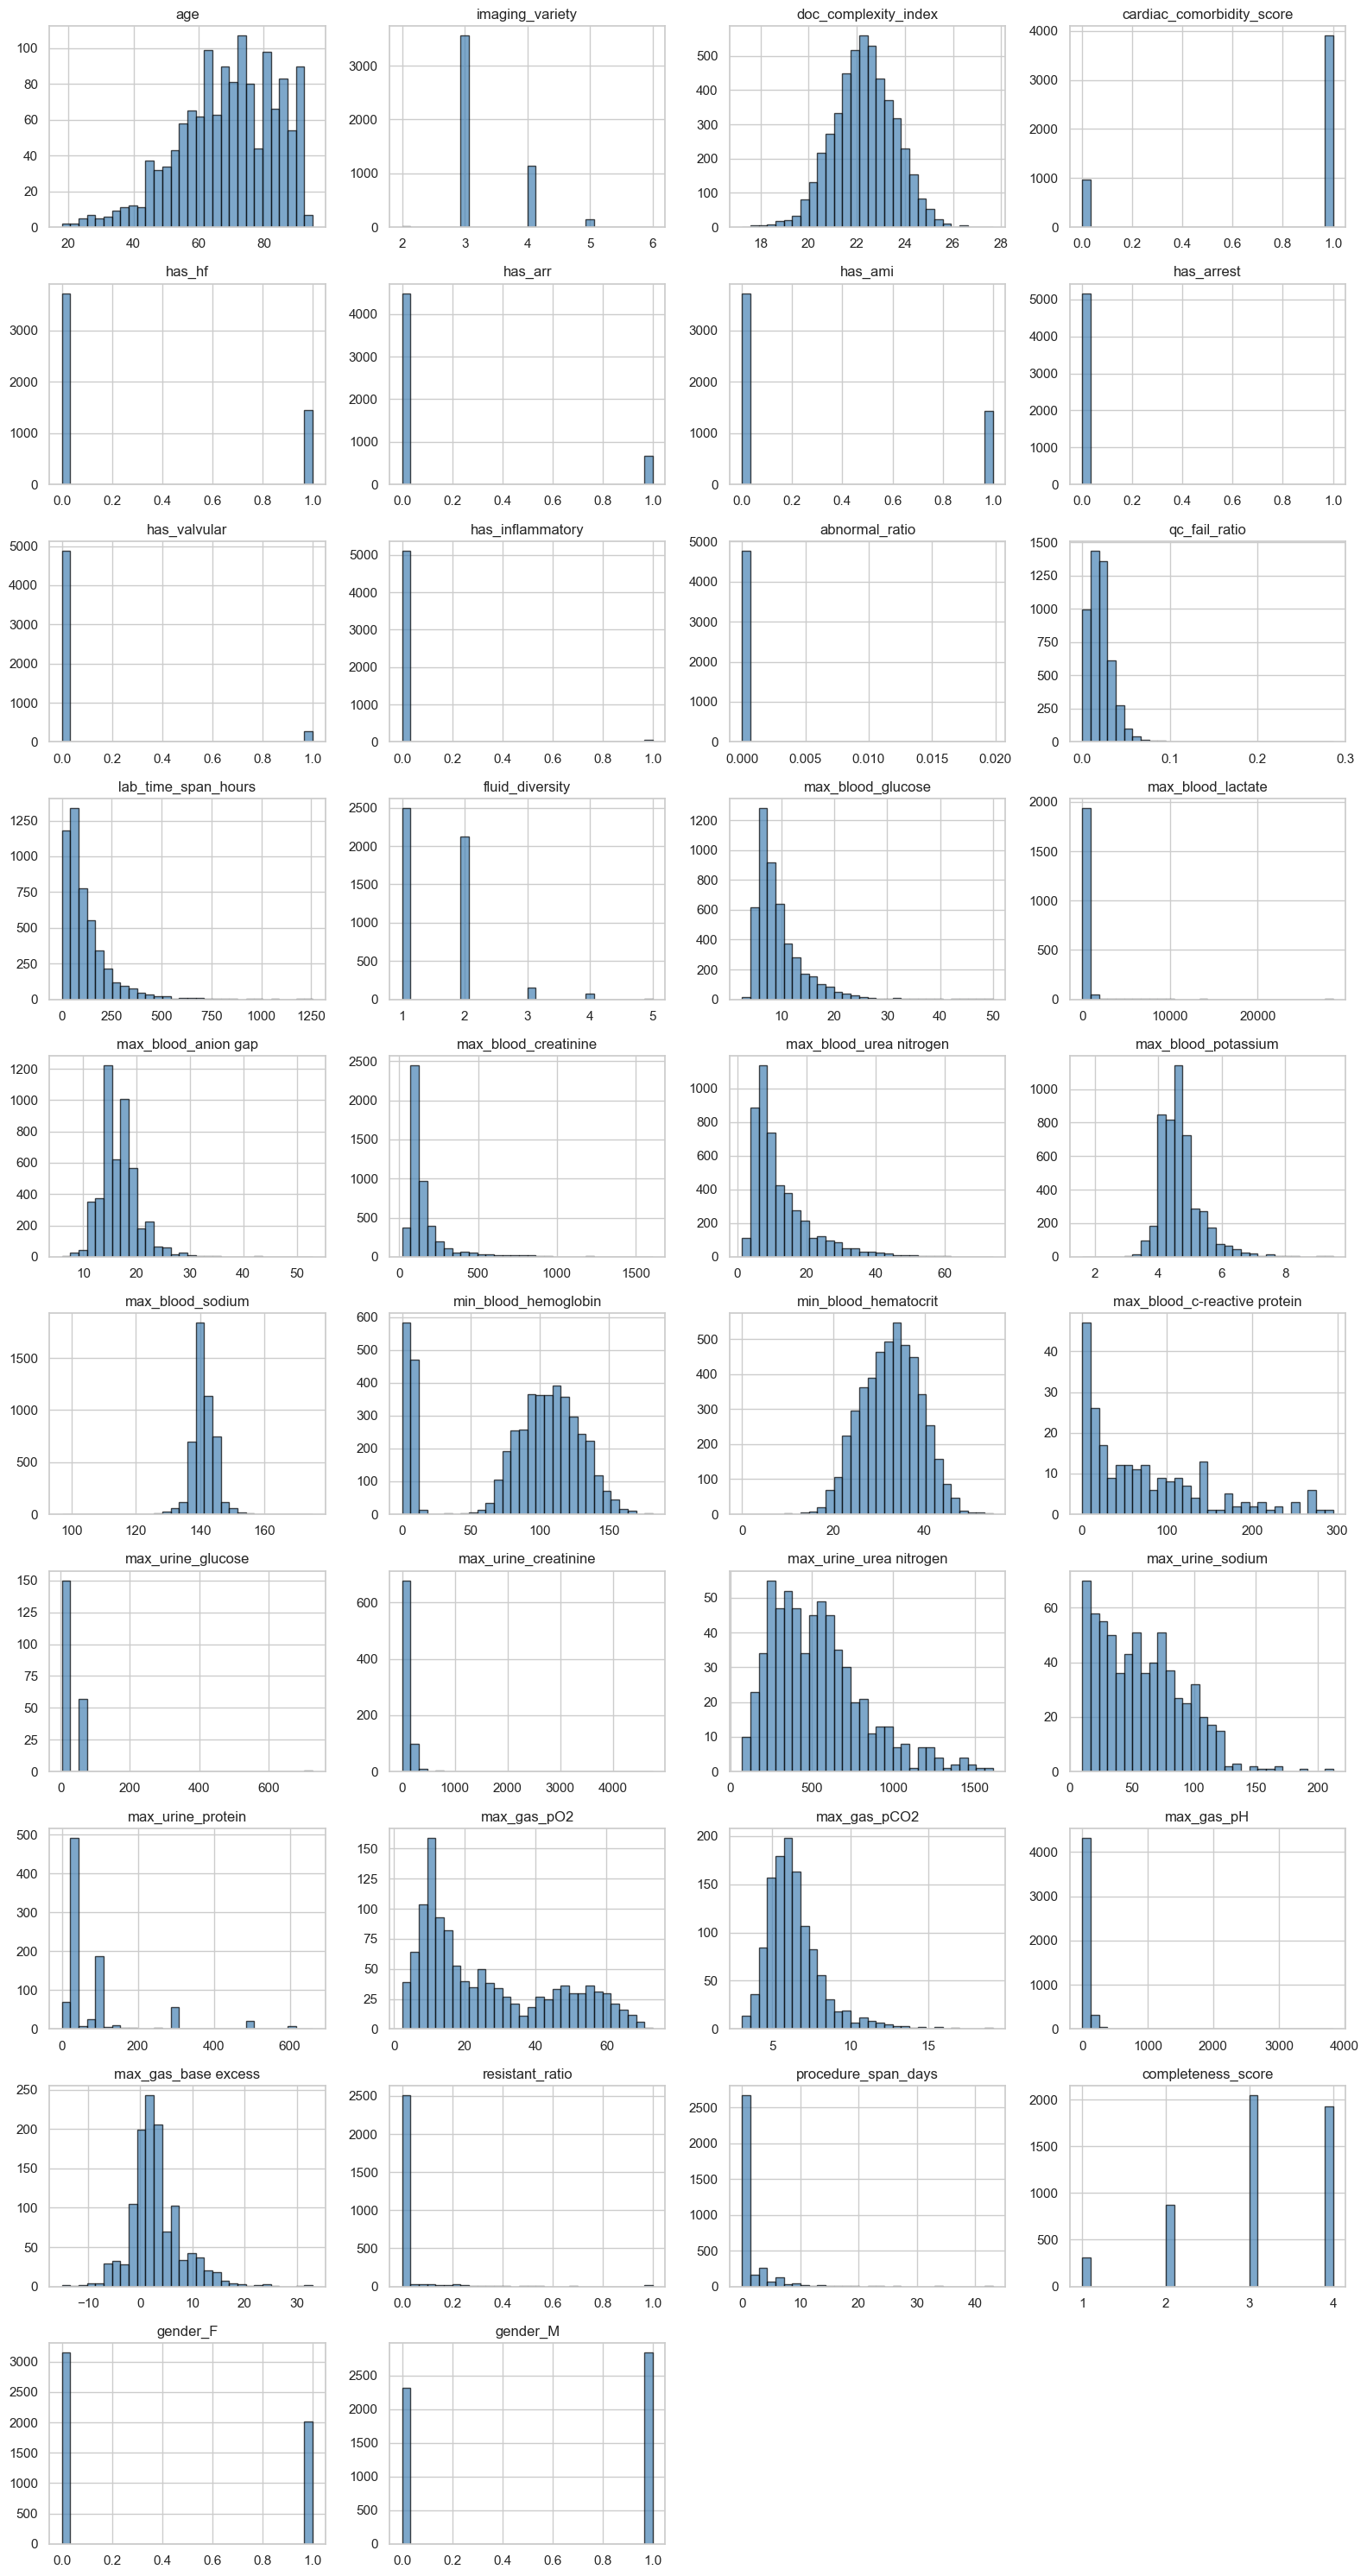

In [131]:
import math

num_cols = patient_profile.select_dtypes(include=[np.number]).columns.tolist()
num_cols = [c for c in num_cols if c not in ('subject_id', 'hadm_id')]
missing_cols = [c for c in num_cols if "missing" in c]
# Plot boxplots and histograms for numeric columns in feat
exclude_from_measure = set(count_cols) | set(has_columns) | set(missing_cols) | {'subject_id', 'hadm_id'}
num_cols = [c for c in num_cols if c not in exclude_from_measure and c != 'is_dead']

if len(num_cols) == 0:
    print("No numeric columns in feat")
else:
    ncols = 4
    nrows = math.ceil(len(num_cols) / ncols)
    total_plots = nrows * ncols

    # BOX PLOTS
    fig_box, axes_box = plt.subplots(nrows, ncols, figsize=(4 * ncols, 3 * nrows))
    axes_box = axes_box.flatten()
    for i, col in enumerate(num_cols):
        sns.boxplot(x=patient_profile[col].dropna(), ax=axes_box[i], color='steelblue')
        axes_box[i].set_title(col)
        axes_box[i].set_xlabel('')
    for j in range(len(num_cols), total_plots):
        axes_box[j].axis('off')
    plt.tight_layout()
    plt.show()

    # HISTOGRAMS
    fig_hist, axes_hist = plt.subplots(nrows, ncols, figsize=(4 * ncols, 3 * nrows))
    axes_hist = axes_hist.flatten()
    for i, col in enumerate(num_cols):
        axes_hist[i].hist(patient_profile[col].dropna(), bins=30, color='steelblue', edgecolor='black', alpha=0.7)
        axes_hist[i].set_title(col)
    for j in range(len(num_cols), total_plots):
        axes_hist[j].axis('off')
    plt.tight_layout()
    plt.show()

# Save big patient profile

In [132]:
patient_profile.to_csv(os.path.join(DATA_DIR, "patient_profile_large.csv"), index=False)

# Corr

In [133]:
patient_profile.columns

Index(['subject_id', 'hadm_id', 'age', 'is_dead', 'charttime', 'icd_code',
       'icd_cat', 'imaging_variety', 'doc_complexity_index',
       'cardiac_comorbidity_score', 'has_heart', 'has_hf', 'has_arr',
       'has_ami', 'has_arrest', 'has_valvular', 'has_inflammatory', 'num_labs',
       'abnormal_ratio', 'qc_fail_ratio', 'lab_time_span_hours',
       'unique_lab_tests', 'unique_examination_groups', 'fluid_diversity',
       'unique_analysis_batches', 'has_labs', 'max_blood_glucose',
       'max_blood_lactate', 'max_blood_anion gap', 'max_blood_creatinine',
       'max_blood_urea nitrogen', 'max_blood_potassium', 'max_blood_sodium',
       'min_blood_hemoglobin', 'min_blood_hematocrit',
       'max_blood_c-reactive protein', 'max_urine_glucose',
       'max_urine_creatinine', 'max_urine_urea nitrogen', 'max_urine_sodium',
       'max_urine_protein', 'max_gas_pO2', 'max_gas_pCO2', 'max_gas_pH',
       'max_gas_base excess', 'count_cbc', 'count_blood_gas', 'count_liver',
       'coun

In [134]:
def corr_report(df, features, data_dir=None, plot_name='selected_features_corr.png', threshold=0.60, figsize=(12,10), show_plot=True):
    """
    Compute correlation matrix for given features in df, plot heatmap, and return correlations + high-corr pairs.
    ...
    """
    import os
    import matplotlib.pyplot as plt
    import seaborn as sns
    import numpy as np
    import pandas as pd

    # keep only existing requested cols
    sel = [c for c in features if c in df.columns]
    if not sel:
        raise ValueError("No requested features found in dataframe.")

    tmp = df[sel].copy()

    # one-hot encode gender into F/M/missing to avoid arbitrary numeric codes
    if 'gender' in tmp.columns:
        g = tmp['gender'].astype(str).str.strip().str.upper()
        tmp['gender_F'] = (g == 'F').astype(int)
        tmp['gender_M'] = (g == 'M').astype(int)
        tmp['gender_missing'] = (~g.isin(['F', 'M'])).astype(int)
        tmp = tmp.drop(columns=['gender'])

    # booleans -> int (FIXED: use vectorized approach)
    bool_cols = tmp.select_dtypes(include='bool').columns
    tmp[bool_cols] = tmp[bool_cols].astype(int)

    # select numeric columns only
    num_tmp = tmp.select_dtypes(include=[np.number]).copy()
    used_features = num_tmp.columns.tolist()
    if len(used_features) < 2:
        raise ValueError("Need at least two numeric features for correlation. Numeric found: " + ", ".join(used_features))

    # correlation
    corr_df = num_tmp.corr()

    # plot heatmap (mask upper triangle)
    plt.figure(figsize=figsize)
    mask = np.triu(np.ones_like(corr_df, dtype=bool))
    sns.heatmap(corr_df, mask=mask, annot=True, fmt='.2f', cmap='coolwarm', center=0,
                cbar_kws={'label':'corr'})
    plt.title('Correlation matrix — selected features')
    plt.tight_layout()

    # save
    if data_dir is None:
        save_dir = os.path.abspath('.')
    else:
        save_dir = data_dir
    plots_dir = os.path.join(save_dir, 'plots')
    os.makedirs(plots_dir, exist_ok=True)
    save_path = os.path.join(plots_dir, plot_name)
    plt.savefig(save_path, dpi=200, bbox_inches='tight')

    if show_plot:
        plt.show()
    else:
        plt.close()

    # extract high-correlation pairs (upper triangle only)
    cols = corr_df.columns.tolist()
    high_pairs = []
    for i in range(len(cols)):
        for j in range(i+1, len(cols)):
            val = corr_df.iloc[i, j]
            if pd.notna(val) and abs(val) >= threshold:
                high_pairs.append((cols[i], cols[j], float(val)))

    # print brief report
    print(f"Correlation matrix saved to: {save_path}")
    print(f"Numeric features used ({len(used_features)}): {used_features}")
    print(f"High-corr pairs (|r| >= {threshold}): {len(high_pairs)}")
    for a,b,v in sorted(high_pairs, key=lambda x: -abs(x[2])):
        print(f"  {a} <--> {b}  :  {v:.3f}")

    return corr_df, high_pairs, used_features

In [135]:
#corr_df, high_pairs, used = corr_report(patient_profile, patient_profile.columns.tolist(), data_dir=DATA_DIR, threshold=0.80)

# Further select and compute combined features

Indicator,Formula
- Clinical Activity, mean(log1p(imaging, labs, micro, proc))
- Micro Resistance,resist_ratio * log1p(organisms + specimens)
- History Depth,log1p(hpi_length) + log1p(note_hours)
- Procedure Density,total_procedures / procedure_days
- Metabolic Stress,z(Glu) + z(Lac) + z(AnionGap) - z(Bicarb)
- Renal Injury,z(Cr) + z(BUN) + z(Phos) + z(K)
- Oxygenation,z(pCO2) - z(pO2) - z(pH) - z(BaseExcess)
- Liver/Inflam,z(CRP) + z(AST) + z(ALT) + z(LD)
- Hematologic,z(Hb) + z(Hct) + z(RBC) - z(RDW)
- Renal Failure,z(Serum_Cr) - z(Urine_Cr)
- Recentness,1 / (1 + days_since_last_adm)

In [136]:
patient_profile.columns[:50]

Index(['subject_id', 'hadm_id', 'age', 'is_dead', 'charttime', 'icd_code',
       'icd_cat', 'imaging_variety', 'doc_complexity_index',
       'cardiac_comorbidity_score', 'has_heart', 'has_hf', 'has_arr',
       'has_ami', 'has_arrest', 'has_valvular', 'has_inflammatory', 'num_labs',
       'abnormal_ratio', 'qc_fail_ratio', 'lab_time_span_hours',
       'unique_lab_tests', 'unique_examination_groups', 'fluid_diversity',
       'unique_analysis_batches', 'has_labs', 'max_blood_glucose',
       'max_blood_lactate', 'max_blood_anion gap', 'max_blood_creatinine',
       'max_blood_urea nitrogen', 'max_blood_potassium', 'max_blood_sodium',
       'min_blood_hemoglobin', 'min_blood_hematocrit',
       'max_blood_c-reactive protein', 'max_urine_glucose',
       'max_urine_creatinine', 'max_urine_urea nitrogen', 'max_urine_sodium',
       'max_urine_protein', 'max_gas_pO2', 'max_gas_pCO2', 'max_gas_pH',
       'max_gas_base excess', 'count_cbc', 'count_blood_gas', 'count_liver',
       'coun

In [137]:
def compute_indicators_and_run_corr(df, data_dir=None, save_plots=True, corr_threshold=0.70, figsize=(10,8)):
    d = df.copy()
    
    # --- Track components to exclude later ---
    # We will add any raw column used in a formula to this set
    found_components = set()

    # 2. Micro/Resistance Components
    micro_comps = ['resistant_ratio', 'unique_organisms', 'unique_specimen_types']
    for c in micro_comps:
        if c in d.columns:
            found_components.add(c)
    
    if 'resistant_ratio' in d.columns:
        rr = d['resistant_ratio'].fillna(0)
        uo = d['unique_organisms'].fillna(0) if 'unique_organisms' in d.columns else 0
        us = d['unique_specimen_types'].fillna(0) if 'unique_specimen_types' in d.columns else 0
        d['micro_resistance_score'] = rr * np.log1p(uo + us)


    # 4. Procedure Density Components
    if 'total_procedures' in d.columns:
        p_span = 'procedure_span_days'
        if p_span in d.columns: found_components.add(p_span)
        pdays = d[p_span].fillna(1) if p_span in d.columns else 1
        d['procedure_density'] = d['total_procedures'] / pdays.clip(lower=1)

    # 5. Diagnosis Components
    if 'n_diagnoses' in d.columns:
        found_components.add('n_diagnoses')
        d['diagnosis_burden'] = np.log1p(d['n_diagnoses'].fillna(0))

    # --- Analyte Composite Logic ---
    def first_existing(col_candidates):
        for c in col_candidates:
            if c in d.columns:
                return c
        return None

    def robust_z_series(s):
        s = pd.to_numeric(s, errors='coerce')
        med = s.median()
        iqr = s.quantile(0.75) - s.quantile(0.25)
        denom = iqr if iqr > 0 else (s.std() if s.std() > 0 else 1.0)
        return (s.fillna(med) - med) / (denom + 1e-9)

    analyte_candidates = {
        'glucose':       ['max_blood_glucose', 'max_glucose', 'mean_glucose'],
        'lactate':       ['max_blood_lactate', 'max_lactate', 'mean_lactate', 'lactate'],
        'anion_gap':     ['max_blood_anion gap', 'max_blood_anion_gap', 'max_anion_gap', 'anion_gap'],
        'bicarbonate':   ['max_blood_bicarbonate', 'max_bicarbonate', 'total_co2', 'bicarbonate'],
        'creatinine':    ['max_blood_creatinine', 'max_creatinine', 'creatinine'],
        'urea_nitrogen': ['max_blood_urea_nitrogen', 'max_blood_urea nitrogen', 'max_urea_nitrogen', 'bun'],
        'phosphate':     ['max_blood_phosphate', 'max_phosphate', 'phosphate'],
        'potassium':     ['max_blood_potassium', 'max_potassium', 'potassium'],
        'pO2':           ['max_gas_pO2', 'max_pO2', 'po2', 'pao2'],
        'pCO2':          ['max_gas_pCO2', 'max_pCO2', 'pco2', 'paco2'],
        'pH':            ['max_gas_pH', 'max_pH', 'ph'],
        'base_excess':   ['max_gas_base excess', 'max_gas_base_excess', 'max_base_excess', 'base_excess'],
        'crp':           ['max_blood_c-reactive protein', 'max_blood_c-reactive_protein', 'max_blood_crp', 'max_crp', 'c-reactive protein'],
        'ast':           ['max_blood_ast', 'max_ast', 'ast'],
        'alt':           ['max_blood_alt', 'max_alt', 'alt'],
        'ld':            ['max_blood_ld', 'max_ld', 'ldh'],
        'hemoglobin':    ['min_blood_hemoglobin', 'min_hemoglobin', 'hemoglobin'],
        'hematocrit':    ['min_blood_hematocrit', 'min_hematocrit', 'hematocrit'],
        'rbc':           ['min_blood_rbc', 'max_rbc', 'rbc'],
        'rdw':           ['max_blood_rdw', 'max_rdw', 'rdw'],
        'urine_creatinine': ['max_urine_creatinine', 'creatinine_urine'],
        'urine_sodium':     ['max_urine_sodium', 'sodium_urine']
    }

    # Prepare Z-series and track which specific component columns were used
    z = {}
    for analyte, candidates in analyte_candidates.items():
        col = first_existing(candidates)
        if col is not None:
            found_components.add(col) # Tracking the specific raw column
            z[analyte] = robust_z_series(d[col])
        else:
            z[analyte] = pd.Series(0.0, index=d.index)

    # --- Compute the "Old" Indicators ---
    d['metabolic_stress_index'] = z['glucose'] + z['lactate'] + z['anion_gap'] - z['bicarbonate']
    d['renal_injury_score'] = z['creatinine'] + z['urea_nitrogen'] + z['phosphate'] + z['potassium']
    d['oxygenation_dysfunction_index'] = -z['pO2'] + z['pCO2'] - z['pH'] - z['base_excess']
    d['inflammation_liver_stress_index'] = z['crp'] + z['ast'] + z['alt'] + z['ld']
    d['hematologic_stability_score'] = z['hemoglobin'] + z['hematocrit'] + z['rbc'] - z['rdw']

    # --- Compute the "New" Indicators ---
    if 'max_urine_creatinine' in d.columns:
        z_urine_creat = robust_z_series(d['max_urine_creatinine'])
        d['renal_failure_index'] = z['creatinine'] - z_urine_creat
    else:
        d['renal_failure_index'] = 0.0

    d['diagnostic_intensity'] = np.log1p(
        d.get('count_blood_gas', 0) + d.get('count_cardiac', 0) + 
        d.get('count_liver', 0) + d.get('count_cbc', 0)
    )
    # Track the intensity counts as components
    for c in ['count_blood_gas', 'count_cardiac', 'count_liver', 'count_cbc']:
        if c in d.columns: found_components.add(c)

    if 'days_since_last_admission' in d.columns:
        found_components.add('days_since_last_admission')
        d['recent_admission_score'] = 1.0 / (1.0 + d['days_since_last_admission'].fillna(3650))

    # --- Define the final list of Indicators ---
    indicators = [c for c in [
        'clinical_activity', 'micro_resistance_score', 'history_depth', 
        'procedure_density', 'diagnosis_burden', 'metabolic_stress_index', 
        'renal_injury_score', 'oxygenation_dysfunction_index', 
        'inflammation_liver_stress_index', 'hematologic_stability_score',
        'renal_failure_index', 'diagnostic_intensity', 'recent_admission_score'
    ] if c in d.columns]

    # --- Define the "Remaining" list (No Components) ---
    # Every numeric column minus the indicators and minus the components used to build them
    all_numeric = set(d.select_dtypes(include='number').columns)
    excluded = set(indicators) | found_components | {'subject_id', 'hadm_id'}
    remaining_features = [c for c in all_numeric if c not in excluded and not c.endswith('_missing')]

    # --- Run Correlation Reports ---
    save_dir = os.path.abspath('.') if data_dir is None else data_dir
    corr_results = {}

    # 1) NEW INDICATORS ONLY
    name = 'new_indicators_only'
    print(f"\nRunning correlation: {name}")
    corr_results[name] = corr_report(d, indicators, data_dir=save_dir, plot_name=f'{name}_corr.png',
                                    threshold=corr_threshold, figsize=figsize, show_plot=save_plots)

    # 2) INDICATORS + REMAINING (No raw components)
    # This shows how indicators relate to things like age, mortality, gender, etc.
    name = 'indicators_plus_non_components'
    features_combo = indicators + remaining_features
    print(f"\nRunning correlation: {name} (Excluding {len(found_components)} raw components)")
    corr_results[name] = corr_report(d, features_combo, data_dir=save_dir, plot_name=f'{name}_corr.png',
                                    threshold=corr_threshold, figsize=figsize, show_plot=save_plots)

    return d, corr_results, found_components


Running correlation: new_indicators_only


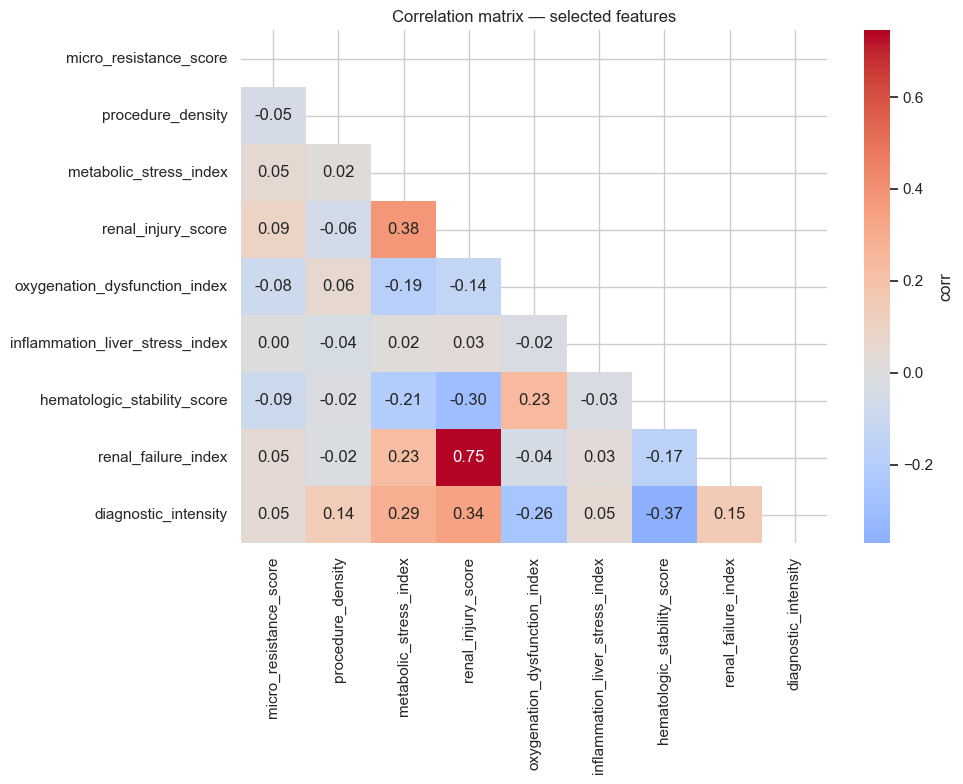

Correlation matrix saved to: Y:\Studium\3. Sem UniPI\Data Analytics 4 digital Health\Data\plots\new_indicators_only_corr.png
Numeric features used (9): ['micro_resistance_score', 'procedure_density', 'metabolic_stress_index', 'renal_injury_score', 'oxygenation_dysfunction_index', 'inflammation_liver_stress_index', 'hematologic_stability_score', 'renal_failure_index', 'diagnostic_intensity']
High-corr pairs (|r| >= 0.7): 1
  renal_injury_score <--> renal_failure_index  :  0.745

Running correlation: indicators_plus_non_components (Excluding 23 raw components)


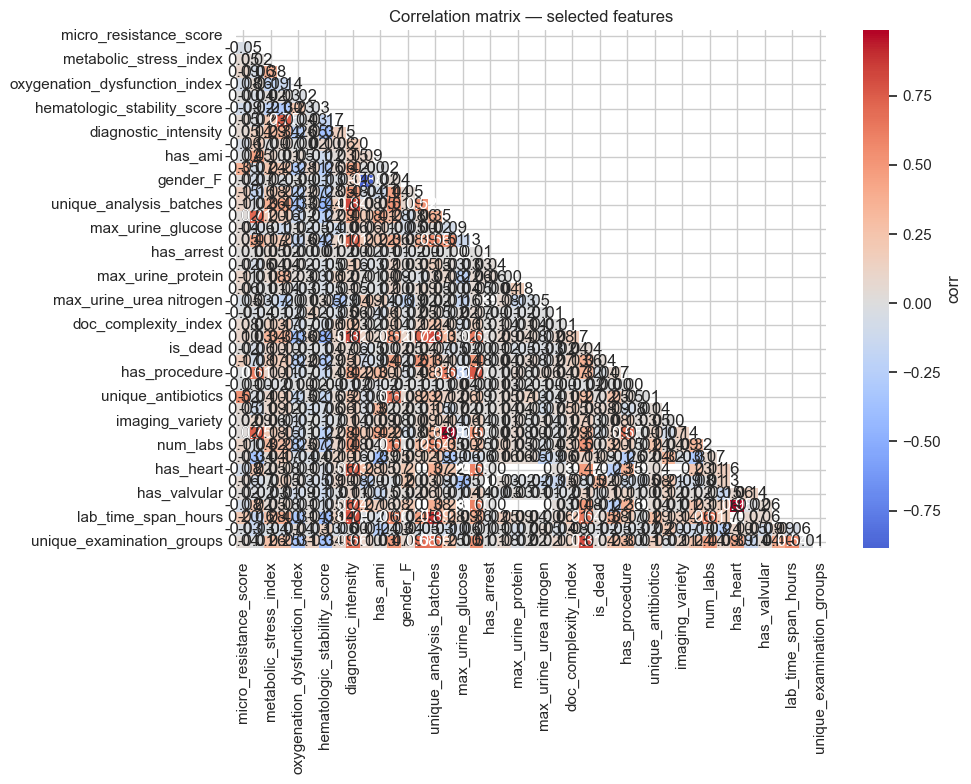

Correlation matrix saved to: Y:\Studium\3. Sem UniPI\Data Analytics 4 digital Health\Data\plots\indicators_plus_non_components_corr.png
Numeric features used (43): ['micro_resistance_score', 'procedure_density', 'metabolic_stress_index', 'renal_injury_score', 'oxygenation_dysfunction_index', 'inflammation_liver_stress_index', 'hematologic_stability_score', 'renal_failure_index', 'diagnostic_intensity', 'gender_M', 'has_ami', 'total_microbio_events', 'gender_F', 'fluid_diversity', 'unique_analysis_batches', 'total_procedures', 'max_urine_glucose', 'completeness_score', 'has_arrest', 'max_blood_sodium', 'max_urine_protein', 'abnormal_ratio', 'max_urine_urea nitrogen', 'has_inflammatory', 'doc_complexity_index', 'unique_lab_tests', 'is_dead', 'has_micro', 'has_procedure', 'qc_fail_ratio', 'unique_antibiotics', 'cardiac_comorbidity_score', 'imaging_variety', 'unique_icd_codes', 'num_labs', 'has_hf', 'has_heart', 'age', 'has_valvular', 'has_labs', 'lab_time_span_hours', 'has_arr', 'unique_e

In [138]:
patient_profile_new, corr_res, found_components = compute_indicators_and_run_corr(patient_profile, data_dir=DATA_DIR, save_plots=True)

In [139]:
found_components

{'count_blood_gas',
 'count_cardiac',
 'count_cbc',
 'count_liver',
 'max_blood_anion gap',
 'max_blood_c-reactive protein',
 'max_blood_creatinine',
 'max_blood_glucose',
 'max_blood_lactate',
 'max_blood_potassium',
 'max_blood_urea nitrogen',
 'max_gas_base excess',
 'max_gas_pCO2',
 'max_gas_pH',
 'max_gas_pO2',
 'max_urine_creatinine',
 'max_urine_sodium',
 'min_blood_hematocrit',
 'min_blood_hemoglobin',
 'procedure_span_days',
 'resistant_ratio',
 'unique_organisms',
 'unique_specimen_types'}

## Drop correlated columns

In [140]:
patient_profile_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5166 entries, 0 to 5165
Columns: 107 entries, subject_id to diagnostic_intensity
dtypes: float64(53), int64(51), object(3)
memory usage: 4.2+ MB


In [141]:
patient_profile_new.shape

(5166, 107)

In [142]:
to_drop = [
    # legacy indicators we already replace
    'has_heart', 'has_labs', 'has_procedure', 'has_micro',

    # strong multicollinearity groups (drop one representative per cluster)
    'imaging_variety_missing',
    'doc_complexity_index_missing',
    'cardiac_comorbidity_score_missing',
    'abnormal_ratio_missing',
    'qc_fail_ratio_missing',
    'lab_time_span_hours_missing',
    'fluid_diversity_missing',
    'gender_missing',
    'max_gas_base excess_missing',
    'max_gas_pO2_missing',
    'max_gas_pCO2_missing',
    'max_blood_creatinine_missing',
    'max_blood_urea nitrogen_missing',
    'max_blood_potassium_missing',
    'max_blood_sodium_missing',
    'max_blood_anion gap_missing',
    'max_blood_glucose_missing',
    'min_blood_hemoglobin_missing',
    'min_blood_hematocrit_missing',
    'max_urine_creatinine_missing',
    'max_urine_urea nitrogen_missing',
    'max_urine_sodium_missing',
    'procedure_density',  # highly collinear with total_procedures

    # previously marked high-corr/raw components
    'renal_injury_score',
    'gender_M',
    'unique_lab_tests',
    'completeness_score',
    'lab_time_span_hours',
    'unique_icd_codes',
    'diagnostic_intensity',
    'max_blood_sodium',
]

# Add any raw component columns we tracked earlier
to_drop = to_drop + list(found_components)
print(f"Dropping {len(to_drop)} columns (high-corr or components): {to_drop}")

patient_profile_new = patient_profile_new.drop(columns=[c for c in to_drop if c in patient_profile_new.columns])

len(patient_profile_new.columns), patient_profile_new.columns

Dropping 58 columns (high-corr or components): ['has_heart', 'has_labs', 'has_procedure', 'has_micro', 'imaging_variety_missing', 'doc_complexity_index_missing', 'cardiac_comorbidity_score_missing', 'abnormal_ratio_missing', 'qc_fail_ratio_missing', 'lab_time_span_hours_missing', 'fluid_diversity_missing', 'gender_missing', 'max_gas_base excess_missing', 'max_gas_pO2_missing', 'max_gas_pCO2_missing', 'max_blood_creatinine_missing', 'max_blood_urea nitrogen_missing', 'max_blood_potassium_missing', 'max_blood_sodium_missing', 'max_blood_anion gap_missing', 'max_blood_glucose_missing', 'min_blood_hemoglobin_missing', 'min_blood_hematocrit_missing', 'max_urine_creatinine_missing', 'max_urine_urea nitrogen_missing', 'max_urine_sodium_missing', 'procedure_density', 'renal_injury_score', 'gender_M', 'unique_lab_tests', 'completeness_score', 'lab_time_span_hours', 'unique_icd_codes', 'diagnostic_intensity', 'max_blood_sodium', 'max_gas_pH', 'min_blood_hematocrit', 'count_blood_gas', 'max_blood

(49,
 Index(['subject_id', 'hadm_id', 'age', 'is_dead', 'charttime', 'icd_code',
        'icd_cat', 'imaging_variety', 'doc_complexity_index',
        'cardiac_comorbidity_score', 'has_hf', 'has_arr', 'has_ami',
        'has_arrest', 'has_valvular', 'has_inflammatory', 'num_labs',
        'abnormal_ratio', 'qc_fail_ratio', 'unique_examination_groups',
        'fluid_diversity', 'unique_analysis_batches', 'max_urine_glucose',
        'max_urine_urea nitrogen', 'max_urine_protein', 'total_microbio_events',
        'unique_antibiotics', 'total_procedures', 'age_missing',
        'has_hf_missing', 'has_arr_missing', 'has_ami_missing',
        'has_arrest_missing', 'has_valvular_missing',
        'has_inflammatory_missing', 'max_blood_lactate_missing',
        'max_blood_c-reactive protein_missing', 'max_urine_glucose_missing',
        'max_urine_protein_missing', 'max_gas_pH_missing',
        'resistant_ratio_missing', 'procedure_span_days_missing', 'gender_F',
        'micro_resistance_sc

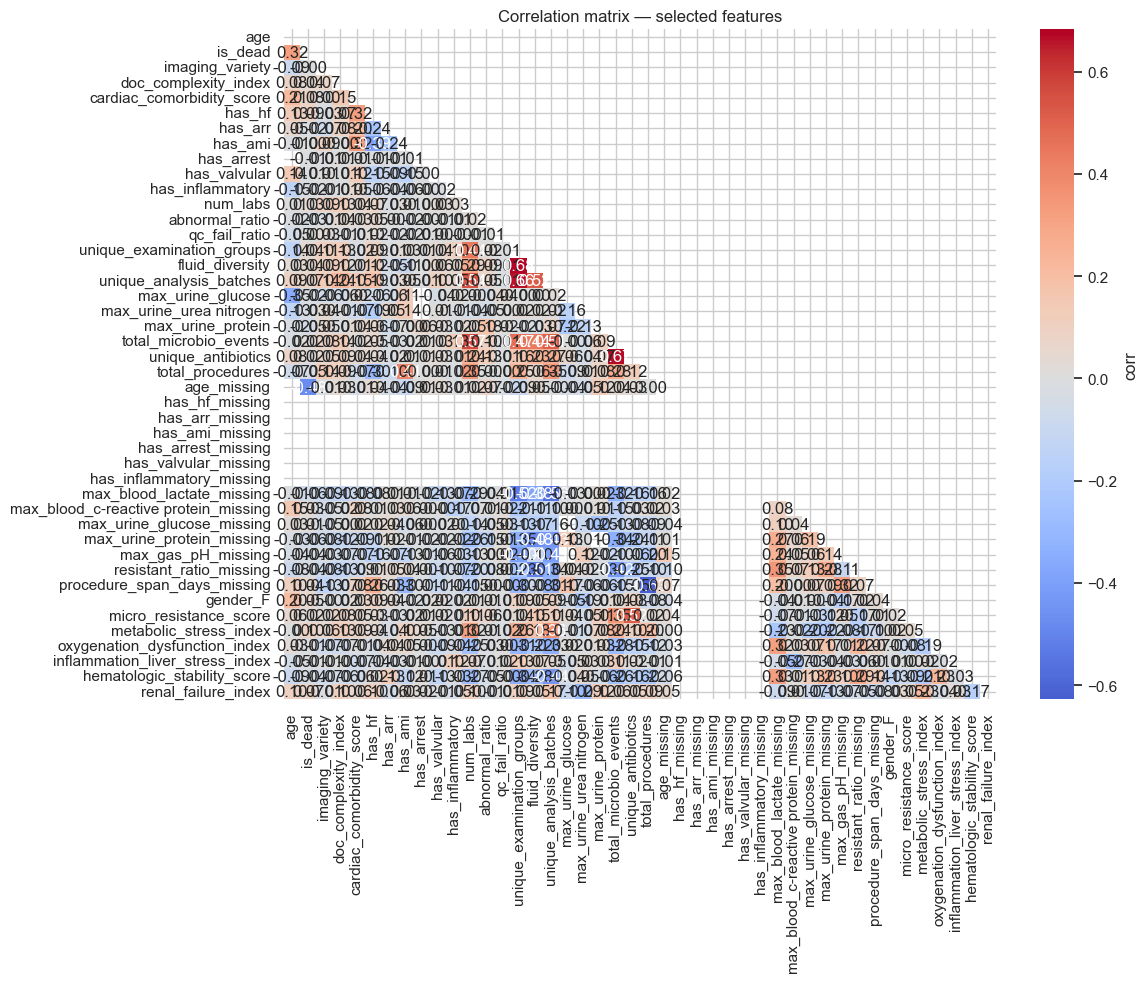

Correlation matrix saved to: Y:\Studium\3. Sem UniPI\Data Analytics 4 digital Health\Data\plots\selected_features_corr.png
Numeric features used (44): ['age', 'is_dead', 'imaging_variety', 'doc_complexity_index', 'cardiac_comorbidity_score', 'has_hf', 'has_arr', 'has_ami', 'has_arrest', 'has_valvular', 'has_inflammatory', 'num_labs', 'abnormal_ratio', 'qc_fail_ratio', 'unique_examination_groups', 'fluid_diversity', 'unique_analysis_batches', 'max_urine_glucose', 'max_urine_urea nitrogen', 'max_urine_protein', 'total_microbio_events', 'unique_antibiotics', 'total_procedures', 'age_missing', 'has_hf_missing', 'has_arr_missing', 'has_ami_missing', 'has_arrest_missing', 'has_valvular_missing', 'has_inflammatory_missing', 'max_blood_lactate_missing', 'max_blood_c-reactive protein_missing', 'max_urine_glucose_missing', 'max_urine_protein_missing', 'max_gas_pH_missing', 'resistant_ratio_missing', 'procedure_span_days_missing', 'gender_F', 'micro_resistance_score', 'metabolic_stress_index', 'o

In [143]:
sel = [c for c in patient_profile_new.columns if c not in ('subject_id', 'hadm_id')]

corr_df, high_pairs, used = corr_report(patient_profile_new, sel, data_dir=DATA_DIR, threshold=0.70)

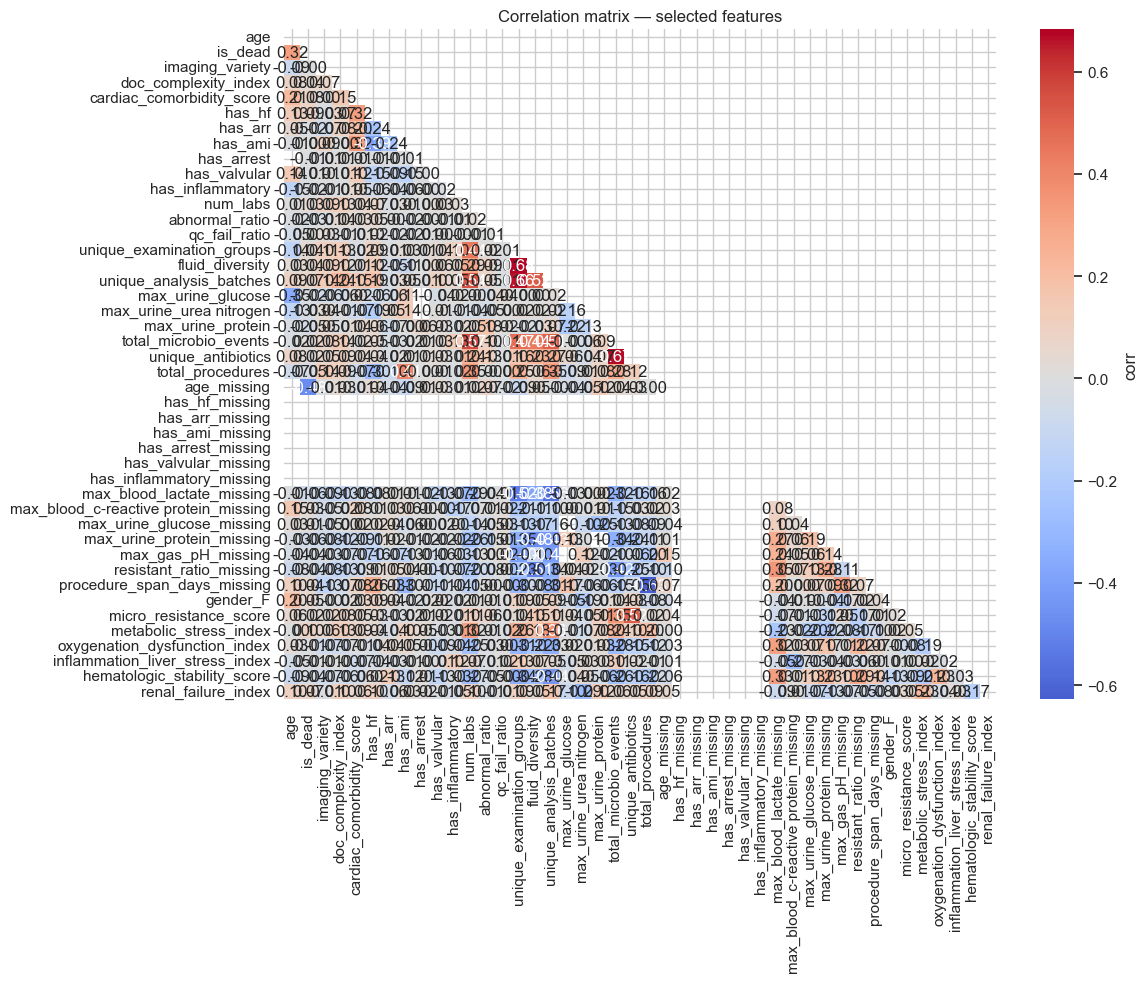

Correlation matrix saved to: Y:\Studium\3. Sem UniPI\Data Analytics 4 digital Health\Data\plots\selected_features_corr.png
Numeric features used (44): ['age', 'is_dead', 'imaging_variety', 'doc_complexity_index', 'cardiac_comorbidity_score', 'has_hf', 'has_arr', 'has_ami', 'has_arrest', 'has_valvular', 'has_inflammatory', 'num_labs', 'abnormal_ratio', 'qc_fail_ratio', 'unique_examination_groups', 'fluid_diversity', 'unique_analysis_batches', 'max_urine_glucose', 'max_urine_urea nitrogen', 'max_urine_protein', 'total_microbio_events', 'unique_antibiotics', 'total_procedures', 'age_missing', 'has_hf_missing', 'has_arr_missing', 'has_ami_missing', 'has_arrest_missing', 'has_valvular_missing', 'has_inflammatory_missing', 'max_blood_lactate_missing', 'max_blood_c-reactive protein_missing', 'max_urine_glucose_missing', 'max_urine_protein_missing', 'max_gas_pH_missing', 'resistant_ratio_missing', 'procedure_span_days_missing', 'gender_F', 'micro_resistance_score', 'metabolic_stress_index', 'o

In [144]:
# Ensure bool/has_ are numeric
sel = [c for c in patient_profile_new.columns if c not in ('subject_id', 'hadm_id')]
corr_df, high_pairs, used = corr_report(patient_profile_new, sel, data_dir=DATA_DIR, threshold=0.70)

# Save this uncorrelated broad profile large "master" (with nans tho)

In [145]:
patient_profile_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5166 entries, 0 to 5165
Data columns (total 49 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   subject_id                            5166 non-null   int64  
 1   hadm_id                               5166 non-null   int64  
 2   age                                   1363 non-null   float64
 3   is_dead                               4864 non-null   float64
 4   charttime                             4864 non-null   object 
 5   icd_code                              4864 non-null   object 
 6   icd_cat                               4864 non-null   object 
 7   imaging_variety                       4864 non-null   float64
 8   doc_complexity_index                  4864 non-null   float64
 9   cardiac_comorbidity_score             4864 non-null   float64
 10  has_hf                                5166 non-null   int64  
 11  has_arr          

In [146]:
patient_profile_new.describe().T

,count,mean,std,min,25%,50%,75%,max
subject_id,5166.0,1.539306e+07,3.073751e+06,1.000098e+07,1.267767e+07,1.539807e+07,1.812905e+07,1.999860e+07
hadm_id,5166.0,2.501832e+07,2.871364e+06,2.000446e+07,2.261127e+07,2.502269e+07,2.746995e+07,2.999967e+07
age,1363.0,6.897872e+01,1.497336e+01,1.800000e+01,6.000000e+01,7.000000e+01,8.100000e+01,9.500000e+01
is_dead,4864.0,8.182566e-02,2.741271e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
imaging_variety,4864.0,3.297081e+00,5.291655e-01,2.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,6.000000e+00
doc_complexity_index,4864.0,2.230601e+01,1.271144e+00,1.722996e+01,2.148126e+01,2.230973e+01,2.317492e+01,2.765688e+01
cardiac_comorbidity_score,4864.0,8.022204e-01,3.983660e-01,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
has_hf,5166.0,2.801007e-01,4.490917e-01,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
has_arr,5166.0,1.312427e-01,3.376983e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
has_ami,5166.0,2.785521e-01,4.483299e-01,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00


In [147]:
patient_profile_new.to_csv(os.path.join(data_save_path, "patient_profile_large_uncorr.csv"), index=False)

# FInal DU of patient prfile broad

In [148]:
patient_profile_large = patient_profile_new.copy()

In [149]:
patient_profile_large.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5166 entries, 0 to 5165
Data columns (total 49 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   subject_id                            5166 non-null   int64  
 1   hadm_id                               5166 non-null   int64  
 2   age                                   1363 non-null   float64
 3   is_dead                               4864 non-null   float64
 4   charttime                             4864 non-null   object 
 5   icd_code                              4864 non-null   object 
 6   icd_cat                               4864 non-null   object 
 7   imaging_variety                       4864 non-null   float64
 8   doc_complexity_index                  4864 non-null   float64
 9   cardiac_comorbidity_score             4864 non-null   float64
 10  has_hf                                5166 non-null   int64  
 11  has_arr          

In [150]:
patient_profile_large.describe().T

,count,mean,std,min,25%,50%,75%,max
subject_id,5166.0,1.539306e+07,3.073751e+06,1.000098e+07,1.267767e+07,1.539807e+07,1.812905e+07,1.999860e+07
hadm_id,5166.0,2.501832e+07,2.871364e+06,2.000446e+07,2.261127e+07,2.502269e+07,2.746995e+07,2.999967e+07
age,1363.0,6.897872e+01,1.497336e+01,1.800000e+01,6.000000e+01,7.000000e+01,8.100000e+01,9.500000e+01
is_dead,4864.0,8.182566e-02,2.741271e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
imaging_variety,4864.0,3.297081e+00,5.291655e-01,2.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,6.000000e+00
doc_complexity_index,4864.0,2.230601e+01,1.271144e+00,1.722996e+01,2.148126e+01,2.230973e+01,2.317492e+01,2.765688e+01
cardiac_comorbidity_score,4864.0,8.022204e-01,3.983660e-01,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
has_hf,5166.0,2.801007e-01,4.490917e-01,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
has_arr,5166.0,1.312427e-01,3.376983e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
has_ami,5166.0,2.785521e-01,4.483299e-01,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00


Boxplots saved to: Y:\Studium\3. Sem UniPI\Data Analytics 4 digital Health\Data\plots\patient_profile_large_boxplots_grid.png


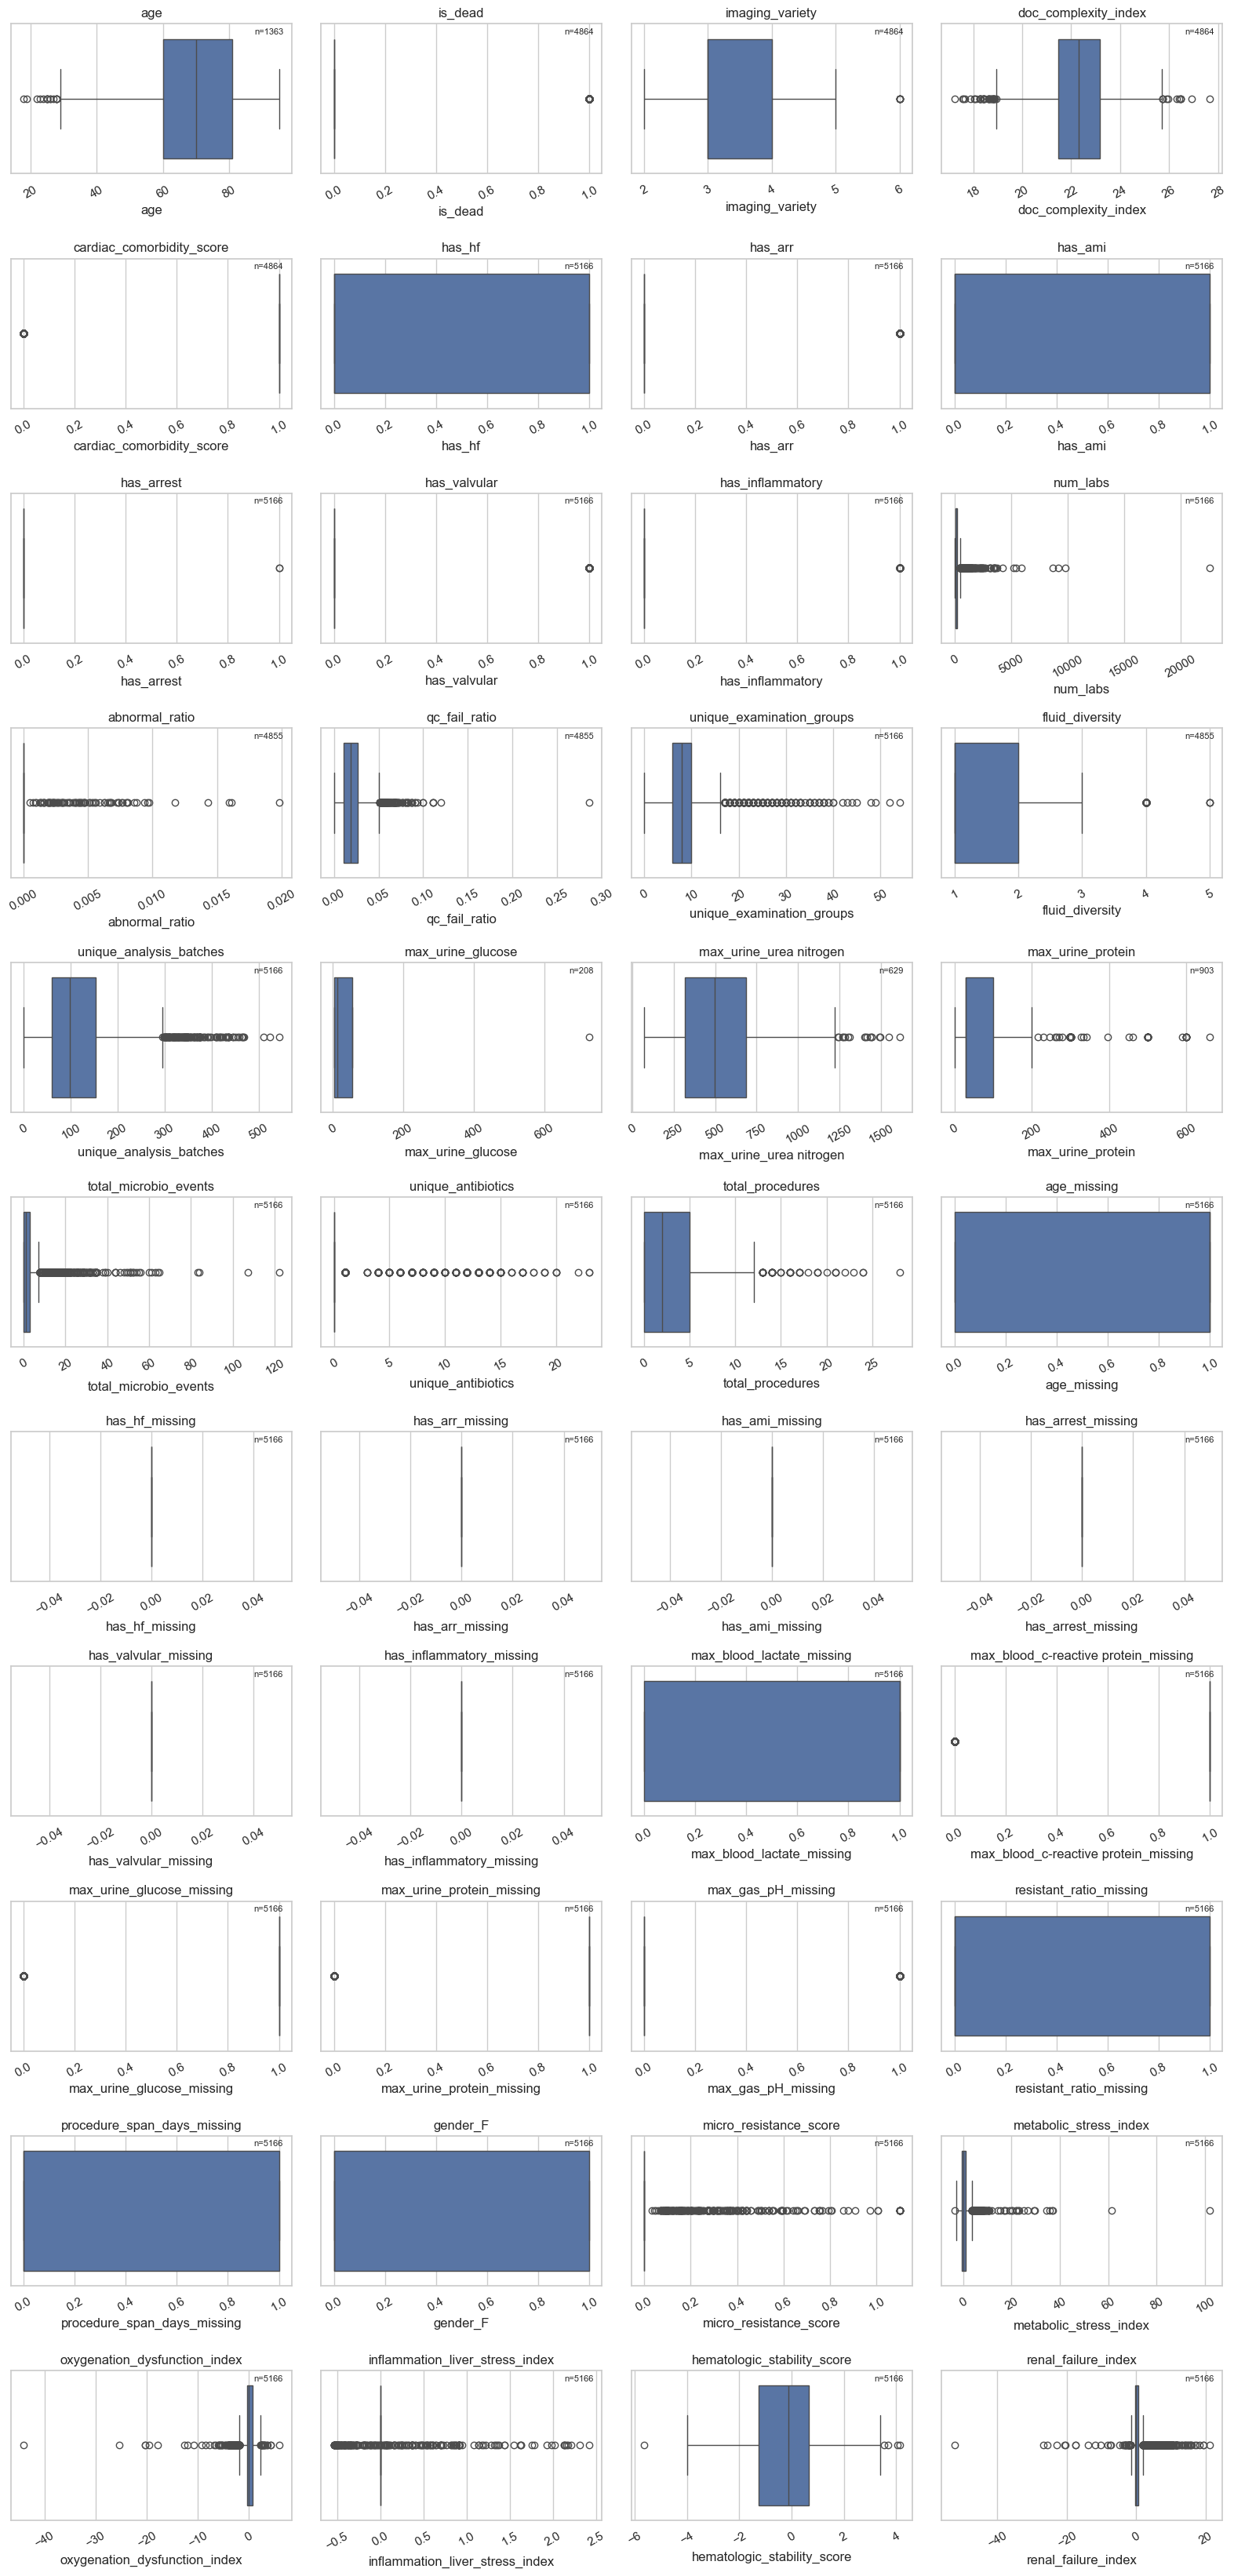

In [151]:
# Boxplots for all numeric columns in patient_profile_large (exclude ids)
import math
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

num_cols = [c for c in patient_profile_large.select_dtypes(include=[np.number]).columns
            if c not in ('subject_id', 'hadm_id')]
if not num_cols:
    print("No numeric columns found for boxplots.")
else:
    cols_per_row = 4
    n = len(num_cols)
    rows = math.ceil(n / cols_per_row)
    fig, axes = plt.subplots(rows, cols_per_row, figsize=(cols_per_row * 4, rows * 3))
    axes = axes.flatten() if n > 1 else [axes]

    for i, col in enumerate(num_cols):
        ax = axes[i]
        # avoid plotting infinite values
        series = patient_profile_large[col].replace([np.inf, -np.inf], np.nan).dropna()
        if series.empty:
            ax.text(0.5, 0.5, "no data", ha='center', va='center')
            ax.set_title(col)
            continue
        sns.boxplot(x=series, ax=ax, color='C0')
        ax.set_title(col)
        ax.tick_params(axis='x', rotation=30)
        ax.text(0.97, 0.97, f"n={len(series)}", transform=ax.transAxes,
                ha='right', va='top', fontsize=8)

    # turn off any unused axes
    for j in range(i + 1, len(axes)):
        axes[j].axis('off')

    plt.tight_layout()
    os.makedirs(os.path.join(DATA_DIR, 'plots'), exist_ok=True)
    out_path = os.path.join(DATA_DIR, 'plots', 'patient_profile_large_boxplots_grid.png')
    plt.savefig(out_path, dpi=200, bbox_inches='tight')
    print(f"Boxplots saved to: {out_path}")
    plt.show()

In [152]:
constant_cols = [col for col in patient_profile_large.columns if patient_profile_large[col].nunique() <= 1]
print(f"{len(constant_cols)} constant columns: {constant_cols}")

6 constant columns: ['has_hf_missing', 'has_arr_missing', 'has_ami_missing', 'has_arrest_missing', 'has_valvular_missing', 'has_inflammatory_missing']


## Handle NaNs


In [153]:
df_work = patient_profile_large.copy()

# 1) Drop columns with too many NaNs or not desired
cols_to_drop = ['age', 'max_urine_glucose', 'max_urine_urea nitrogen', 'max_urine_protein']   # too sparse!
df_work = df_work.drop(columns=[c for c in cols_to_drop if c in df_work.columns], errors='ignore')

# impute with 0: columns where missingness usually implies "normalcy" or "neutrality"
for col in ['is_dead', 'susceptible_ratio', 'micro_qc_fail', 'micro_qc_warn', 'fluid_diversity', 'abnormal_ratio', 'qc_fail_ratio' ]:
    if col in df_work.columns:
        df_work[col] = pd.to_numeric(df_work[col], errors='coerce').fillna(0.0)

final_profile_broad = df_work.copy()
final_profile_broad.to_csv(os.path.join(data_save_path, "patient_profile_broad.csv"), index=False)
final_profile_broad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5166 entries, 0 to 5165
Data columns (total 45 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   subject_id                            5166 non-null   int64  
 1   hadm_id                               5166 non-null   int64  
 2   is_dead                               5166 non-null   float64
 3   charttime                             4864 non-null   object 
 4   icd_code                              4864 non-null   object 
 5   icd_cat                               4864 non-null   object 
 6   imaging_variety                       4864 non-null   float64
 7   doc_complexity_index                  4864 non-null   float64
 8   cardiac_comorbidity_score             4864 non-null   float64
 9   has_hf                                5166 non-null   int64  
 10  has_arr                               5166 non-null   int64  
 11  has_ami          

In [154]:
# 2. Identify 'Constant' columns (columns where everyone has the same value)
# In a smaller subset, many has_ columns often become 100% '1'
constant_cols = [col for col in final_profile_broad.columns if final_profile_broad[col].nunique() <= 1]

print(f"Dropping {len(constant_cols)} constant columns: {constant_cols}")

# 3. Drop them
df_clean_broad = final_profile_broad.drop(columns=constant_cols).copy()

# 4. Identify 'Redundant' has_ columns 
# If you have the numeric result (min/max), the has_ indicator is 100% redundant
redundant_indicators = []
for col in df_clean_broad.columns:
    if col.startswith('has_'):
        lab_name = col.replace('has_', '')
        # Check if a numeric version of this lab exists in the columns
        numeric_matches = [c for c in df_clean_broad.columns if lab_name in c and c != col]
        if numeric_matches:
            redundant_indicators.append(col)

print(f"Dropping {len(redundant_indicators)} redundant indicators: {redundant_indicators}")
df_clean_broad = df_clean_broad.drop(columns=redundant_indicators)

print(f"Final feature count for clustering: {len(df_clean_broad.columns)}")

Dropping 6 constant columns: ['has_hf_missing', 'has_arr_missing', 'has_ami_missing', 'has_arrest_missing', 'has_valvular_missing', 'has_inflammatory_missing']
Dropping 2 redundant indicators: ['has_arr', 'has_ami']
Final feature count for clustering: 37


In [155]:
# drop not needed columsn, and cols with too many nans
df_clean_broad.columns

Index(['subject_id', 'hadm_id', 'is_dead', 'charttime', 'icd_code', 'icd_cat',
       'imaging_variety', 'doc_complexity_index', 'cardiac_comorbidity_score',
       'has_hf', 'has_arrest', 'has_valvular', 'has_inflammatory', 'num_labs',
       'abnormal_ratio', 'qc_fail_ratio', 'unique_examination_groups',
       'fluid_diversity', 'unique_analysis_batches', 'total_microbio_events',
       'unique_antibiotics', 'total_procedures', 'age_missing',
       'max_blood_lactate_missing', 'max_blood_c-reactive protein_missing',
       'max_urine_glucose_missing', 'max_urine_protein_missing',
       'max_gas_pH_missing', 'resistant_ratio_missing',
       'procedure_span_days_missing', 'gender_F', 'micro_resistance_score',
       'metabolic_stress_index', 'oxygenation_dysfunction_index',
       'inflammation_liver_stress_index', 'hematologic_stability_score',
       'renal_failure_index'],
      dtype='object')

In [156]:
data_save_path

WindowsPath('Y:/Studium/3. Sem UniPI/Data Analytics 4 digital Health/data_analytics_4_health_unipi/Data')

In [157]:
final_profile_broad = df_clean_broad.copy()
final_profile_broad.to_csv(os.path.join(data_save_path, "patient_profile_broad_clean.csv"), index=False)

Distribution of is_dead: std=0.267, mean=0.077
Distribution of imaging_variety: std=0.529, mean=3.297
Distribution of doc_complexity_index: std=1.271, mean=22.306
Distribution of cardiac_comorbidity_score: std=0.398, mean=0.802
Distribution of has_hf: std=0.449, mean=0.280
Distribution of has_arrest: std=0.020, mean=0.000
Distribution of has_valvular: std=0.227, mean=0.055
Distribution of has_inflammatory: std=0.102, mean=0.010
Distribution of num_labs: std=500.862, mean=226.015
Distribution of abnormal_ratio: std=0.001, mean=0.000
Distribution of qc_fail_ratio: std=0.015, mean=0.019
Distribution of unique_examination_groups: std=5.491, mean=8.663
Distribution of fluid_diversity: std=0.727, mean=1.459
Distribution of unique_analysis_batches: std=75.608, mean=112.211
Distribution of total_microbio_events: std=6.744, mean=3.017
Distribution of unique_antibiotics: std=2.823, mean=0.761
Distribution of total_procedures: std=3.141, mean=2.806
Distribution of age_missing: std=0.441, mean=0.7

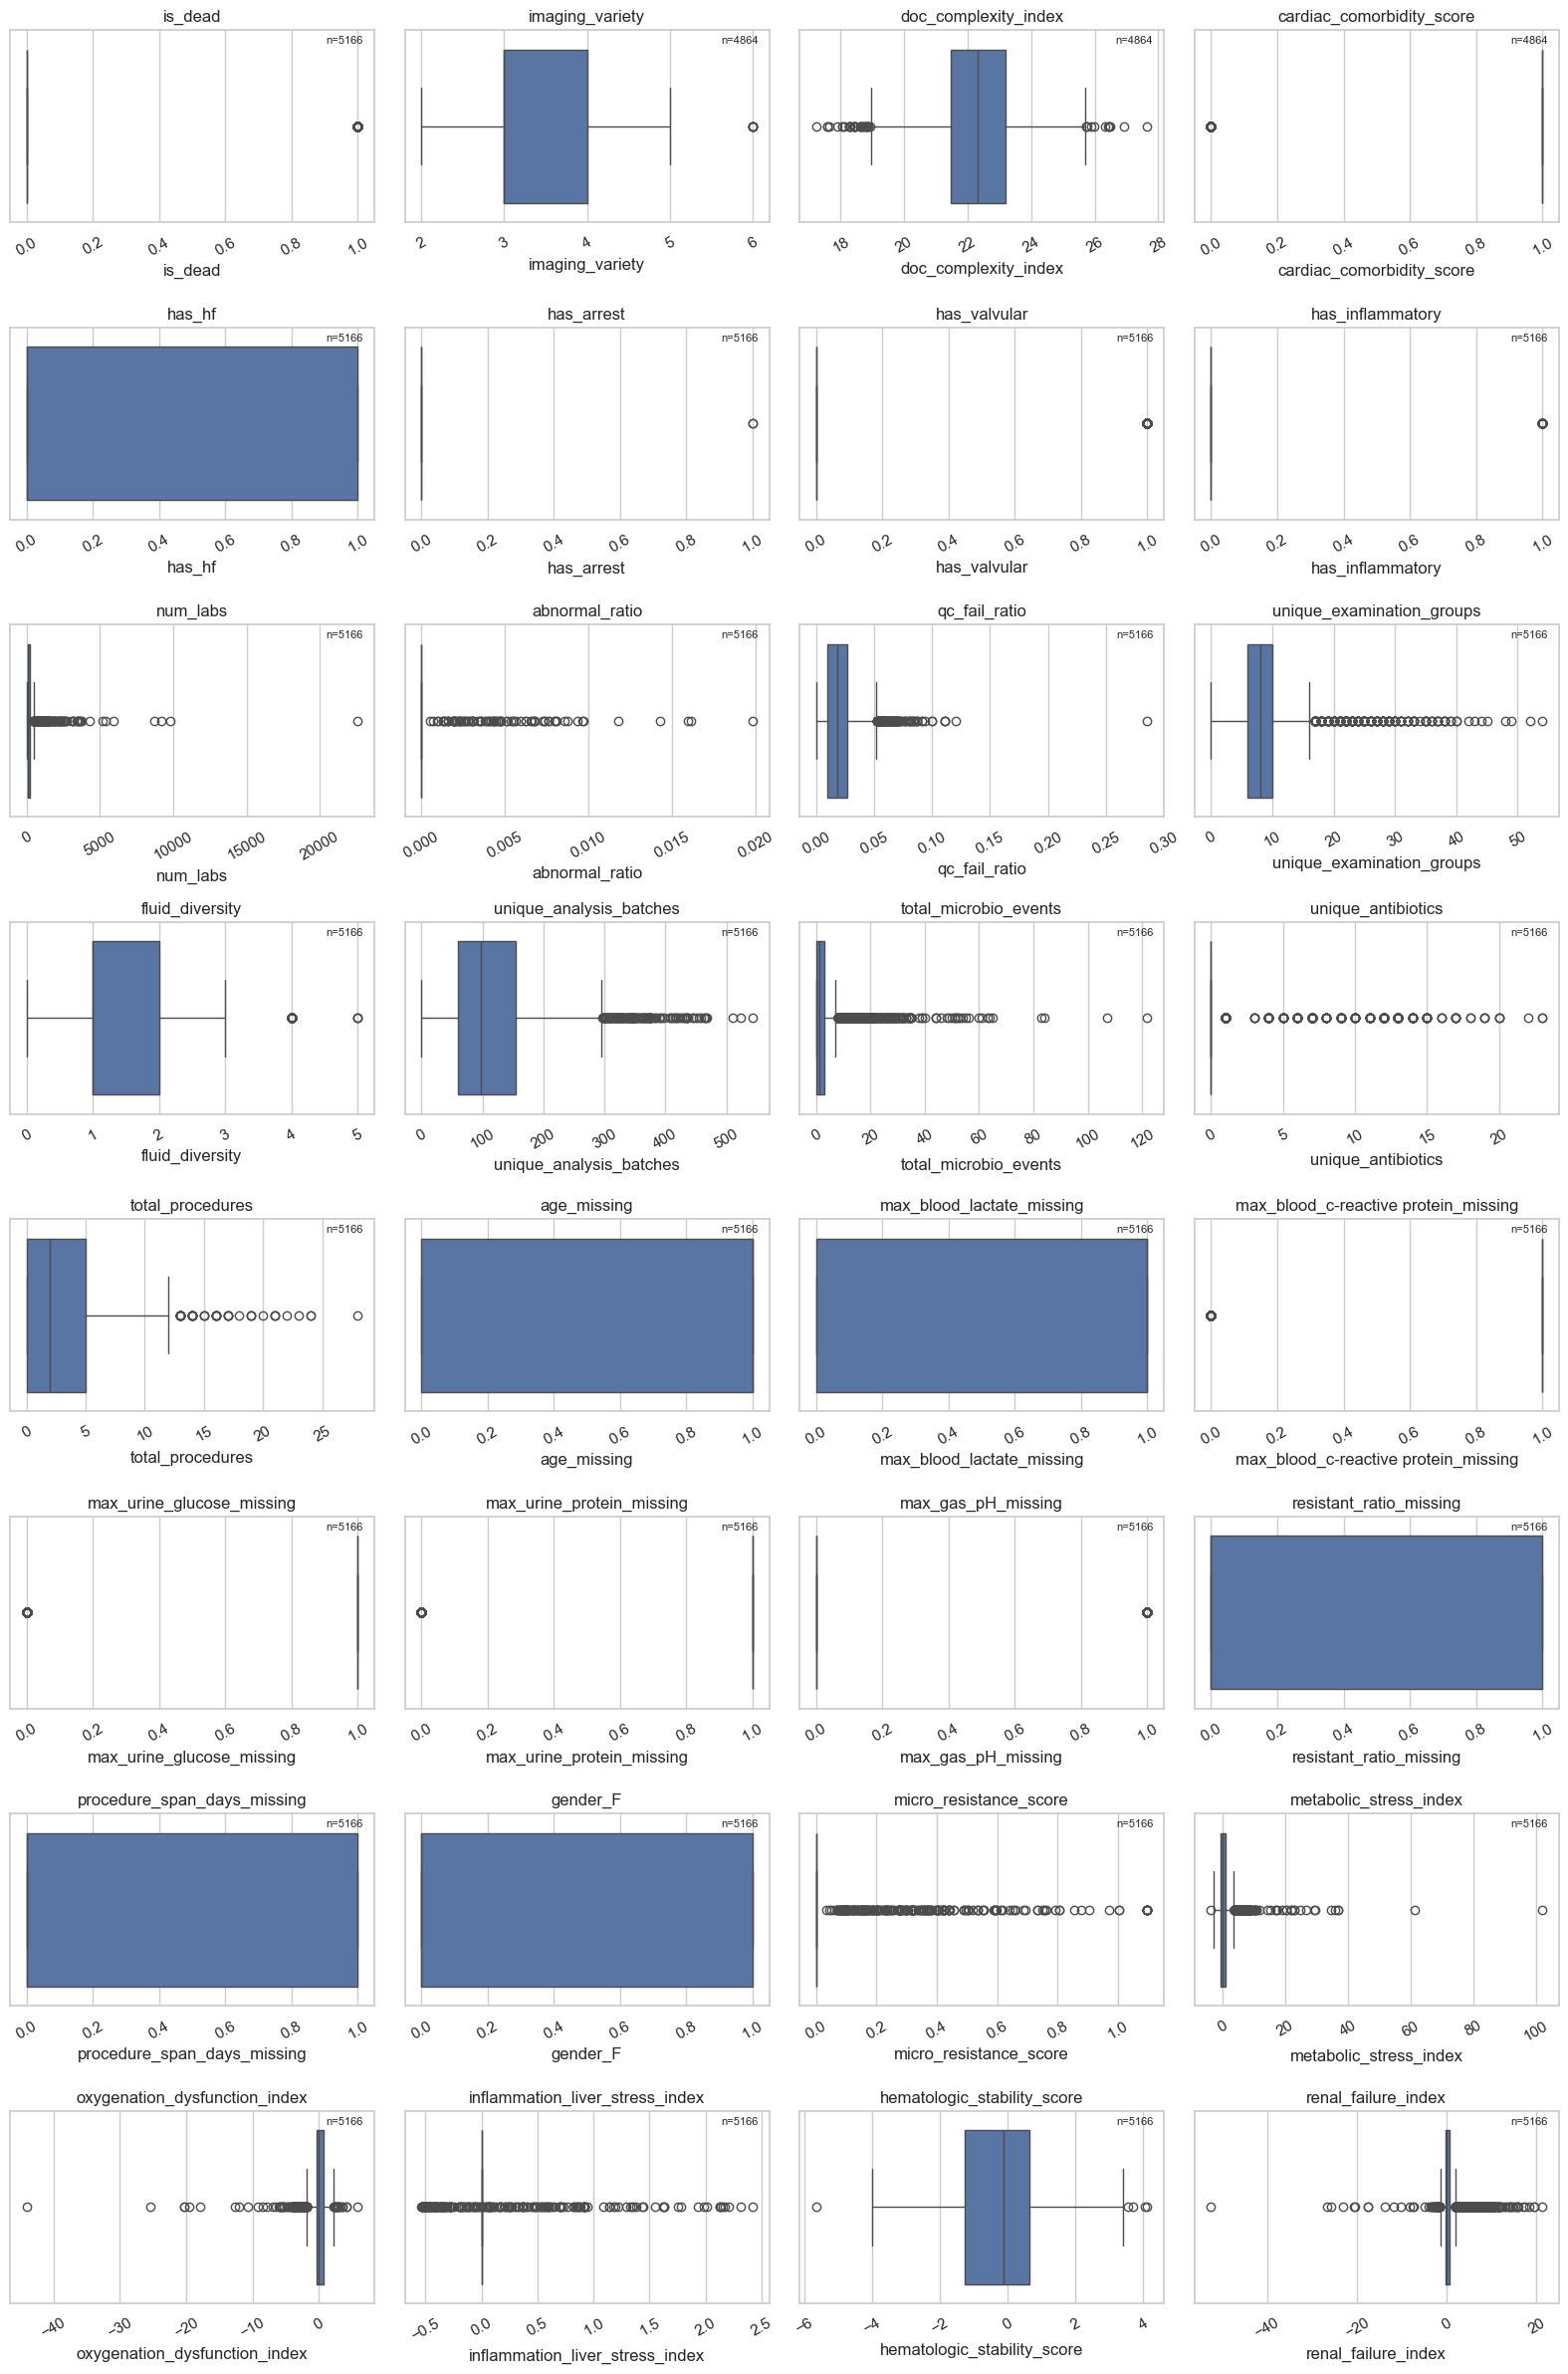

In [158]:
import math
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

num_cols = [c for c in final_profile_broad.select_dtypes(include=[np.number]).columns
            if c not in ('subject_id', 'hadm_id')]
if not num_cols:
    print("No numeric columns found for boxplots.")
else:
    cols_per_row = 4
    n = len(num_cols)
    rows = math.ceil(n / cols_per_row)
    fig, axes = plt.subplots(rows, cols_per_row, figsize=(cols_per_row * 4, rows * 3))
    axes = axes.flatten() if n > 1 else [axes]

    for i, col in enumerate(num_cols):
        print(f"Distribution of {col}: std={final_profile_broad[col].std():.3f}, mean={final_profile_broad[col].mean():.3f}")
        ax = axes[i]
        # avoid plotting infinite values
        series = final_profile_broad[col].replace([np.inf, -np.inf], np.nan).dropna()
        if series.empty:
            ax.text(0.5, 0.5, "no data", ha='center', va='center')
            ax.set_title(col)
            continue
        sns.boxplot(x=series, ax=ax, color='C0')
        ax.set_title(col)
        ax.tick_params(axis='x', rotation=30)
        ax.text(0.97, 0.97, f"n={len(series)}", transform=ax.transAxes,
                ha='right', va='top', fontsize=8)

    # turn off any unused axes
    for j in range(i + 1, len(axes)):
        axes[j].axis('off')

    plt.tight_layout()
    os.makedirs(os.path.join(DATA_DIR, 'plots'), exist_ok=True)
    out_path = os.path.join(DATA_DIR, 'plots', 'patient_profile_broad_boxplots_grid.png')
    plt.savefig(out_path, dpi=200, bbox_inches='tight')
    print(f"Boxplots saved to: {out_path}")
    plt.show()

## Create clsutering profile

In [159]:
final_profile_broad_clustering = final_profile_broad.copy()

In [160]:
# we keep these features 
clustering_features = [
    'subject_id', 'hadm_id',
    'abnormal_ratio',
    'qc_fail_ratio',
    'fluid_diversity',
    'procedure_span_days_missing',
    'gender_F',
    'micro_resistance_score',
    'metabolic_stress_index',
    'oxygenation_dysfunction_index',
    'inflammation_liver_stress_index',
    'hematologic_stability_score',
    'renal_failure_index'
]

features = [c for c in clustering_features if c in final_profile_broad_clustering.columns]
final_profile_broad_clustering = final_profile_broad_clustering[features]
final_profile_broad_clustering.columns

Index(['subject_id', 'hadm_id', 'abnormal_ratio', 'qc_fail_ratio',
       'fluid_diversity', 'procedure_span_days_missing', 'gender_F',
       'micro_resistance_score', 'metabolic_stress_index',
       'oxygenation_dysfunction_index', 'inflammation_liver_stress_index',
       'hematologic_stability_score', 'renal_failure_index'],
      dtype='object')

*Log-transformation was applied to right-skewed care-intensity and accumulation features to reduce the influence of extreme values on distance calculations, thereby improving the stability and interpretability of the resulting patient clusters.*

Non-linear transformations were applied selectively to right-skewed accumulation features to prevent disproportionate influence on distance metrics, while physiologically normalized indices were left untransformed to preserve their interpretability and relative geometry.

In [161]:
log_features = [
    'fluid_diversity', 'micro_resistance_score', 
]

print("Applying log1p to:", log_features)

for c in log_features:
    if c in final_profile_broad_clustering.columns:
        final_profile_broad_clustering[c] = np.log1p(final_profile_broad_clustering[c])

Applying log1p to: ['fluid_diversity', 'micro_resistance_score']


Distribution of abnormal_ratio: std=0.001, mean=0.000
Distribution of qc_fail_ratio: std=0.015, mean=0.019
Distribution of fluid_diversity: std=0.314, mean=0.854
Distribution of procedure_span_days_missing: std=0.470, mean=0.330
Distribution of gender_F: std=0.488, mean=0.390
Distribution of micro_resistance_score: std=0.072, mean=0.014
Distribution of metabolic_stress_index: std=2.800, mean=0.537
Distribution of oxygenation_dysfunction_index: std=1.321, mean=-0.045
Distribution of inflammation_liver_stress_index: std=0.159, mean=0.009
Distribution of hematologic_stability_score: std=1.325, mean=-0.287
Distribution of renal_failure_index: std=2.324, mean=0.562
Boxplots saved to: Y:\Studium\3. Sem UniPI\Data Analytics 4 digital Health\Data\plots\patient_profile_broad_clsutering_boxplots_grid.png


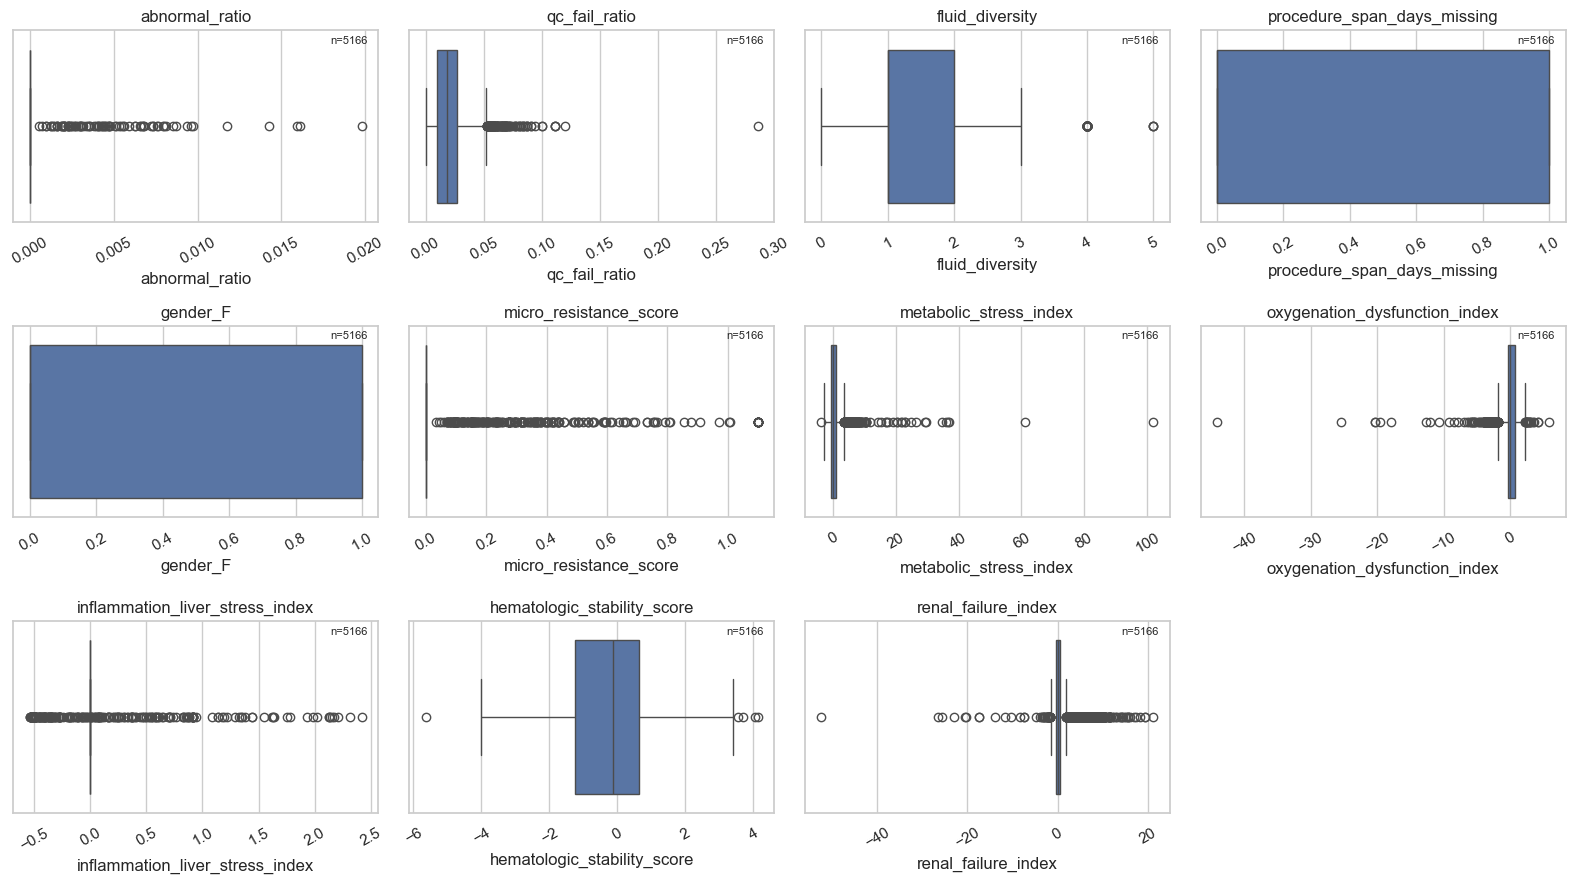

In [162]:
import math
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

num_cols = [c for c in final_profile_broad_clustering.select_dtypes(include=[np.number]).columns
            if c not in ('subject_id', 'hadm_id')]
if not num_cols:
    print("No numeric columns found for boxplots.")
else:
    cols_per_row = 4
    n = len(num_cols)
    rows = math.ceil(n / cols_per_row)
    fig, axes = plt.subplots(rows, cols_per_row, figsize=(cols_per_row * 4, rows * 3))
    axes = axes.flatten() if n > 1 else [axes]

    for i, col in enumerate(num_cols):
        print(f"Distribution of {col}: std={final_profile_broad_clustering[col].std():.3f}, mean={final_profile_broad_clustering[col].mean():.3f}")
        ax = axes[i]
        # avoid plotting infinite values
        series = final_profile_broad[col].replace([np.inf, -np.inf], np.nan).dropna()
        if series.empty:
            ax.text(0.5, 0.5, "no data", ha='center', va='center')
            ax.set_title(col)
            continue
        sns.boxplot(x=series, ax=ax, color='C0')
        ax.set_title(col)
        ax.tick_params(axis='x', rotation=30)
        ax.text(0.97, 0.97, f"n={len(series)}", transform=ax.transAxes,
                ha='right', va='top', fontsize=8)

    # turn off any unused axes
    for j in range(i + 1, len(axes)):
        axes[j].axis('off')

    plt.tight_layout()
    os.makedirs(os.path.join(DATA_DIR, 'plots'), exist_ok=True)
    out_path = os.path.join(DATA_DIR, 'plots', 'patient_profile_broad_clsutering_boxplots_grid.png')
    plt.savefig(out_path, dpi=200, bbox_inches='tight')
    print(f"Boxplots saved to: {out_path}")
    plt.show()

In [163]:
#final_profile_broad.drop(columns=["procedure_span_days_missing"], errors='ignore', inplace=True)

final_profile_broad_clustering.to_csv(os.path.join(data_save_path, "patient_profile_broad_clean_clustering.csv"), index=False)
final_profile_broad_clustering.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5166 entries, 0 to 5165
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   subject_id                       5166 non-null   int64  
 1   hadm_id                          5166 non-null   int64  
 2   abnormal_ratio                   5166 non-null   float64
 3   qc_fail_ratio                    5166 non-null   float64
 4   fluid_diversity                  5166 non-null   float64
 5   procedure_span_days_missing      5166 non-null   int64  
 6   gender_F                         5166 non-null   int64  
 7   micro_resistance_score           5166 non-null   float64
 8   metabolic_stress_index           5166 non-null   float64
 9   oxygenation_dysfunction_index    5166 non-null   float64
 10  inflammation_liver_stress_index  5166 non-null   float64
 11  hematologic_stability_score      5166 non-null   float64
 12  renal_failure_index 

## classificaiton profile

In [164]:
classification_only_features = [
    'cardiac_comorbidity_score',
    'has_hf',
    'has_arrest',
    'has_valvular',
    'has_inflammatory',
    'num_labs',
    'total_procedures',
    'total_microbio_events',
    'unique_antibiotics',
    'is_dead',
]

final_profile_broad_class = final_profile_broad.copy()
features = [c for c in clustering_features + classification_only_features if c in final_profile_broad_class.columns]
final_profile_broad_class = final_profile_broad_class[features]
features

['subject_id',
 'hadm_id',
 'abnormal_ratio',
 'qc_fail_ratio',
 'fluid_diversity',
 'procedure_span_days_missing',
 'gender_F',
 'micro_resistance_score',
 'metabolic_stress_index',
 'oxygenation_dysfunction_index',
 'inflammation_liver_stress_index',
 'hematologic_stability_score',
 'renal_failure_index',
 'cardiac_comorbidity_score',
 'has_hf',
 'has_arrest',
 'has_valvular',
 'has_inflammatory',
 'num_labs',
 'total_procedures',
 'total_microbio_events',
 'unique_antibiotics',
 'is_dead']

1. *For unsupervised clustering, features were selected to capture latent physiological state, microbiological burden, and normalized care intensity while explicitly excluding outcomes, diagnosis codes, and highly correlated availability proxies in order to preserve clinically meaningful distance geometry.*

2. *Missingness indicators were retained only where they encoded orthogonal information about care trajectory completeness, thereby avoiding redundancy-driven clustering along data availability rather than patient state.*

3. *For supervised classification, additional comorbidity, diagnosis, and care-volume features were incorporated to maximize predictive performance, leveraging signals that are informative for outcomes but inappropriate for phenotype discovery.*

4. *This two-stage feature selection strategy ensures a clear separation between phenotype identification and outcome prediction, reducing information leakage while maintaining interpretability and statistical robustness.*


Distribution of abnormal_ratio: std=0.001, mean=0.000
Distribution of qc_fail_ratio: std=0.015, mean=0.019
Distribution of fluid_diversity: std=0.727, mean=1.459
Distribution of procedure_span_days_missing: std=0.470, mean=0.330
Distribution of gender_F: std=0.488, mean=0.390
Distribution of micro_resistance_score: std=0.095, mean=0.017
Distribution of metabolic_stress_index: std=2.800, mean=0.537
Distribution of oxygenation_dysfunction_index: std=1.321, mean=-0.045
Distribution of inflammation_liver_stress_index: std=0.159, mean=0.009
Distribution of hematologic_stability_score: std=1.325, mean=-0.287
Distribution of renal_failure_index: std=2.324, mean=0.562
Distribution of cardiac_comorbidity_score: std=0.398, mean=0.802
Distribution of has_hf: std=0.449, mean=0.280
Distribution of has_arrest: std=0.020, mean=0.000
Distribution of has_valvular: std=0.227, mean=0.055
Distribution of has_inflammatory: std=0.102, mean=0.010
Distribution of num_labs: std=500.862, mean=226.015
Distributi

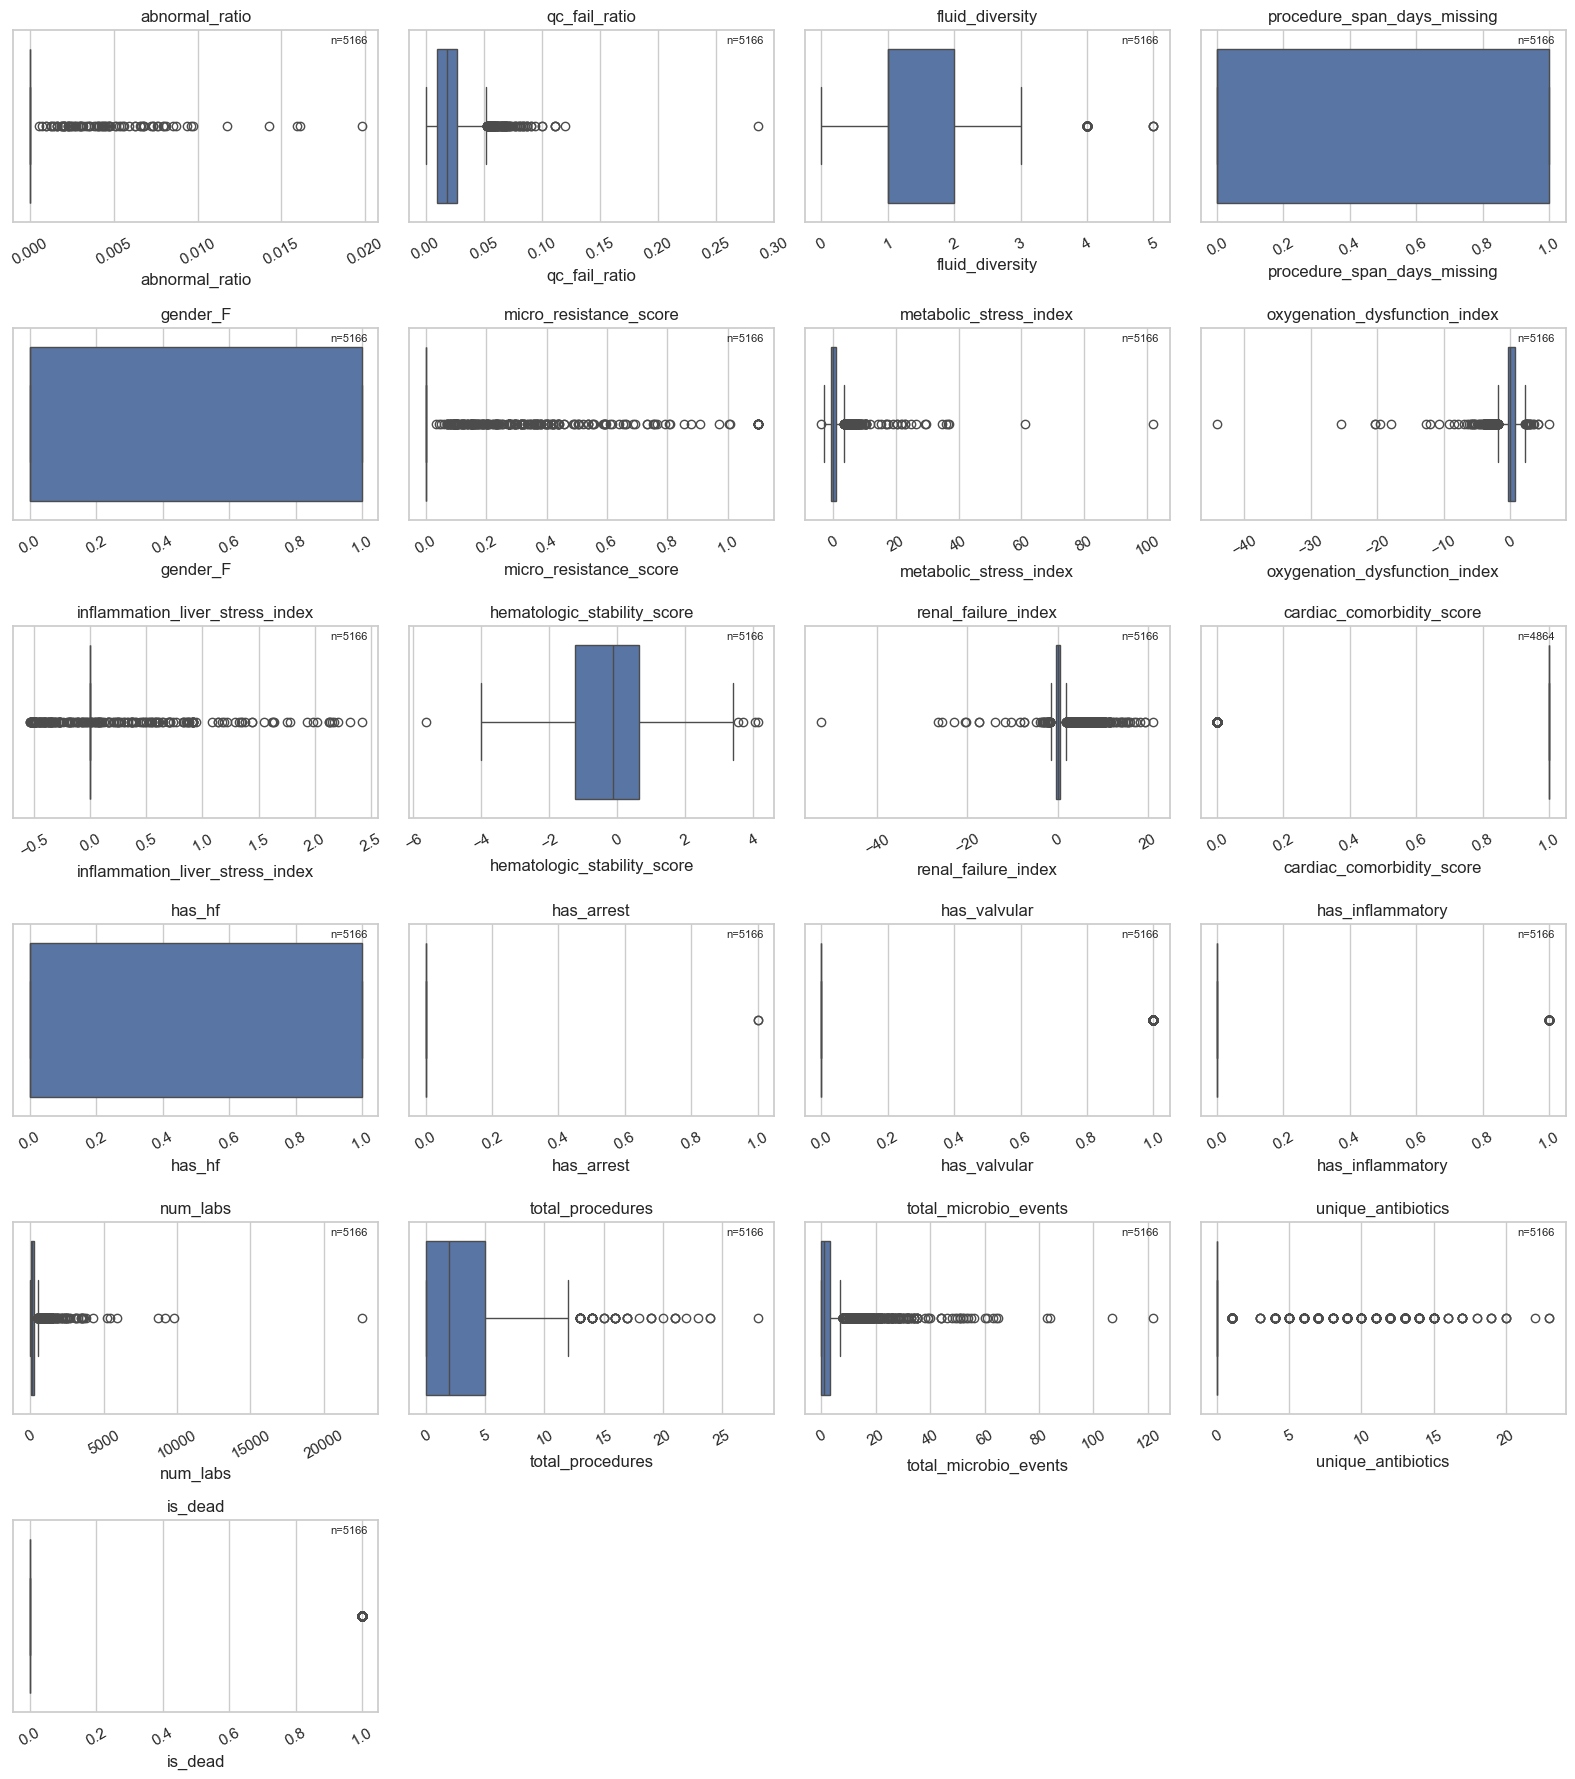

In [165]:
import math
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

num_cols = [c for c in final_profile_broad_class.select_dtypes(include=[np.number]).columns
            if c not in ('subject_id', 'hadm_id')]
if not num_cols:
    print("No numeric columns found for boxplots.")
else:
    cols_per_row = 4
    n = len(num_cols)
    rows = math.ceil(n / cols_per_row)
    fig, axes = plt.subplots(rows, cols_per_row, figsize=(cols_per_row * 4, rows * 3))
    axes = axes.flatten() if n > 1 else [axes]

    for i, col in enumerate(num_cols):
        print(f"Distribution of {col}: std={final_profile_broad_class[col].std():.3f}, mean={final_profile_broad_class[col].mean():.3f}")
        ax = axes[i]
        # avoid plotting infinite values
        series = final_profile_broad_class[col].replace([np.inf, -np.inf], np.nan).dropna()
        if series.empty:
            ax.text(0.5, 0.5, "no data", ha='center', va='center')
            ax.set_title(col)
            continue
        sns.boxplot(x=series, ax=ax, color='C0')
        ax.set_title(col)
        ax.tick_params(axis='x', rotation=30)
        ax.text(0.97, 0.97, f"n={len(series)}", transform=ax.transAxes,
                ha='right', va='top', fontsize=8)

    # turn off any unused axes
    for j in range(i + 1, len(axes)):
        axes[j].axis('off')

    plt.tight_layout()
    os.makedirs(os.path.join(DATA_DIR, 'plots'), exist_ok=True)
    out_path = os.path.join(DATA_DIR, 'plots', 'patient_profile_broad_classification_boxplots_grid.png')
    plt.savefig(out_path, dpi=200, bbox_inches='tight')
    print(f"Boxplots saved to: {out_path}")
    plt.show()

In [166]:

final_profile_broad_class.to_csv(os.path.join(data_save_path, "patient_profile_broad_clean_classification.csv"), index=False)
final_profile_broad_class.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5166 entries, 0 to 5165
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   subject_id                       5166 non-null   int64  
 1   hadm_id                          5166 non-null   int64  
 2   abnormal_ratio                   5166 non-null   float64
 3   qc_fail_ratio                    5166 non-null   float64
 4   fluid_diversity                  5166 non-null   float64
 5   procedure_span_days_missing      5166 non-null   int64  
 6   gender_F                         5166 non-null   int64  
 7   micro_resistance_score           5166 non-null   float64
 8   metabolic_stress_index           5166 non-null   float64
 9   oxygenation_dysfunction_index    5166 non-null   float64
 10  inflammation_liver_stress_index  5166 non-null   float64
 11  hematologic_stability_score      5166 non-null   float64
 12  renal_failure_index 